In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
import numpy

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 12,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)

## 1-1

In [11]:
job2814_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/check/2814_CD_0.pkl")

In [12]:
# sim = inbending
sim = job2814_0
VGS = [-sim.GenEpx, -sim.GenEpy, 10.604 - sim.GenEpz]
VGS2 = [sim.GenPpx + sim.GenGpx, sim.GenPp + sim.GenGpy, sim.GenPpz + sim.GenGpz]
ele = [sim.GenEpx, sim.GenEpy, sim.GenEpz]
pro = [sim.GenPpx, sim.GenPpy, sim.GenPpz]
gam = [sim.GenGpx, sim.GenGpy, sim.GenGpz]
GenEe = getEnergy(ele, 0.000511)
GenPe = getEnergy(pro, 0.93827)
GenQ2 = -((ebeam - GenEe)**2 - mag2(VGS))
GenNu = (ebeam - GenEe)
GenY = GenNu/ebeam
GenxB = GenQ2 / 2.0 / M / GenNu
GenT = 2 * M * (GenPe - M)
costheta = cosTheta(VGS, gam)
GenT2 =  (M * GenQ2 + 2 * M * GenNu * (GenNu - np.sqrt(GenNu * GenNu + GenQ2) * costheta))\
        / (M + GenNu - np.sqrt(GenNu * GenNu + GenQ2) * costheta)

v3l = cross(beam, ele)
v3h = cross(pro, VGS)
v3g = cross(VGS, gam)
GenPhi = angle(v3l, v3h)
sim.loc[:, "GenQ2"] = GenQ2
sim.loc[:, "GenxB"] = GenxB
sim.loc[:, "GenT1"] = GenT
sim.loc[:, "GenT2"] = GenT2
sim.loc[:, "GenPhi1"] = np.where(dot(v3l, pro) > 0, 360.0 - GenPhi, GenPhi)
GenPhi2 = angle(v3l, v3g)
sim.loc[:, "GenPhi2"] = np.where(dot(v3l, gam) < 0, 360.0 - GenPhi2, GenPhi2)

sim.loc[:, "GenW"] = np.sqrt(np.maximum(0, M*M + 2*M*GenNu-GenQ2))

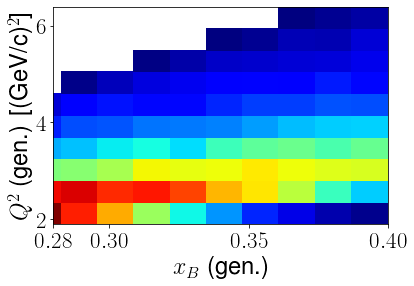

In [15]:
plt.hist2d(job2814_0.GenxB, job2814_0.GenQ2, cmap = cmap, cmin = 1)
plt.xlim([0.28, 0.4])
plt.xticks([0.28, 0.3, 0.35, 0.4])
plt.xlabel(r"$x_B$" + " (gen.)")
plt.ylabel(r"$Q^{2}$" + " (gen.)" + " ["+GeVc2 +"]")
plt.show()

## 1-2

In [73]:
job3111_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_0.pkl")
job3111_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_1.pkl")
job3111_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_2.pkl")
job3111_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_3.pkl")
job3111_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_4.pkl")
job3111_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_5.pkl")
job3111_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_6.pkl")
job3111_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_7.pkl")
job3111_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_8.pkl")
job3111_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_9.pkl")
job3111_10 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_10.pkl")
job3111_11 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_11.pkl")
job3111_12 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_12.pkl")
job3111_13 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_13.pkl")
job3111_14 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_14.pkl")
job3111_15 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_15.pkl")
job3111_16 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_16.pkl")
job3111_17 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_17.pkl")
job3111_18 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_18.pkl")
job3111_19 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_19.pkl")

In [74]:
outbending = pd.concat([globals()['job3111_'+str(i)] for i in range(20)])

In [75]:
job2942_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_0.pkl")
job2942_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_1.pkl")
job2942_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_2.pkl")
job2942_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_3.pkl")
job2942_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_4.pkl")
job2942_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_5.pkl")
job2942_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_6.pkl")
job2942_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_7.pkl")
job2942_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_8.pkl")
job2942_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_9.pkl")

In [76]:
job3057_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_0.pkl")
job3057_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_1.pkl")
job3057_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_2.pkl")
job3057_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_3.pkl")
job3057_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_4.pkl")
job3057_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_5.pkl")
job3057_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_6.pkl")
job3057_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_7.pkl")
job3057_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_8.pkl")
job3057_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_9.pkl")

In [77]:
job2942 = pd.concat([globals()['job2942_'+str(i)] for i in range(10)])
job3057 = pd.concat([globals()['job3057_'+str(i)] for i in range(10)])
inbending = pd.concat([job2942, job3057])

In [78]:
inbendingCD = inbending.loc[inbending.Psector>7, :]
inbendingFD = inbending.loc[inbending.Psector<7, :]
outbendingCD = outbending.loc[outbending.Psector>7, :]
outbendingFD = outbending.loc[outbending.Psector<7, :]

In [79]:
print(len(inbendingFD), len(inbendingCD))
print(len(outbendingFD), len(outbendingCD))

193800 1353029
201774 3468368


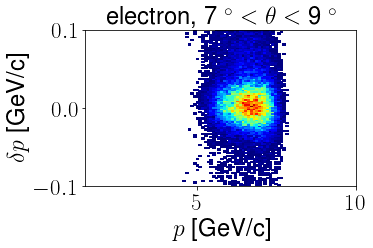

In [44]:
ind = 1
thetaCond = (inbending.Etheta >= 2*ind+5) & (inbending.Etheta < 2*ind+7)
plt.hist2d(inbending.loc[thetaCond, "Ep"], inbending.loc[thetaCond, "GenEp"] - inbending.loc[thetaCond, "Ep"], bins = [np.linspace(1.5, 10, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)
plt.xlabel(r"$p$" + " ["+GeVc+"]")
plt.ylabel(r"$\delta p$" + " ["+GeVc+"]")
plt.title("electron, " + str(2*ind+5)+" "+degree + r" $<\theta<$ " + str(2*ind+7)+" "+degree)
plt.tight_layout()
plt.savefig("1-2-1.pdf")

In [82]:
def correction(x, t):
    x0, x1 = x
    return x0 + x1/t

def correction4(x, t):
    x0, x1, x2 = x
    return x0 + x1*np.exp(x2*t)

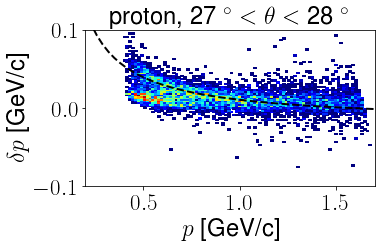

In [71]:
# ind = 1
thetaCond = (inbending.Ptheta >= 27) & (inbending.Ptheta < 28)
plt.hist2d(inbending.loc[thetaCond, "Pp"], inbending.loc[thetaCond, "GenPp"] - inbending.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)
plt.xlabel(r"$p$" + " ["+GeVc+"]")
theta = np.array([27.5])
const_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
                  [-0.0123049 + 0.00028887*theta, -0.138227479 + 8.07557430*0.001*theta -1.34807927*0.0001*theta*theta, -0.0275235])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
                  [0.01528006 - 0.00024079*theta, 5.65817597*0.01 -2.36903348*0.001*theta + 4.93780046*0.00001*theta*theta, 0.03998975])
param = [const_FD[0], coeff_FD[0]]
#         if ind == 11:
#             param = params[10]
plt.plot(np.linspace(0.2, 1.7, 51), correction(param, np.linspace(0.2, 1.7, 51)), color='k', linewidth=2, linestyle='--')

plt.ylabel(r"$\delta p$" + " ["+GeVc+"]")
plt.title("proton, " + str(27)+" "+degree + r" $<\theta<$ " + str(28)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("1-2-2.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


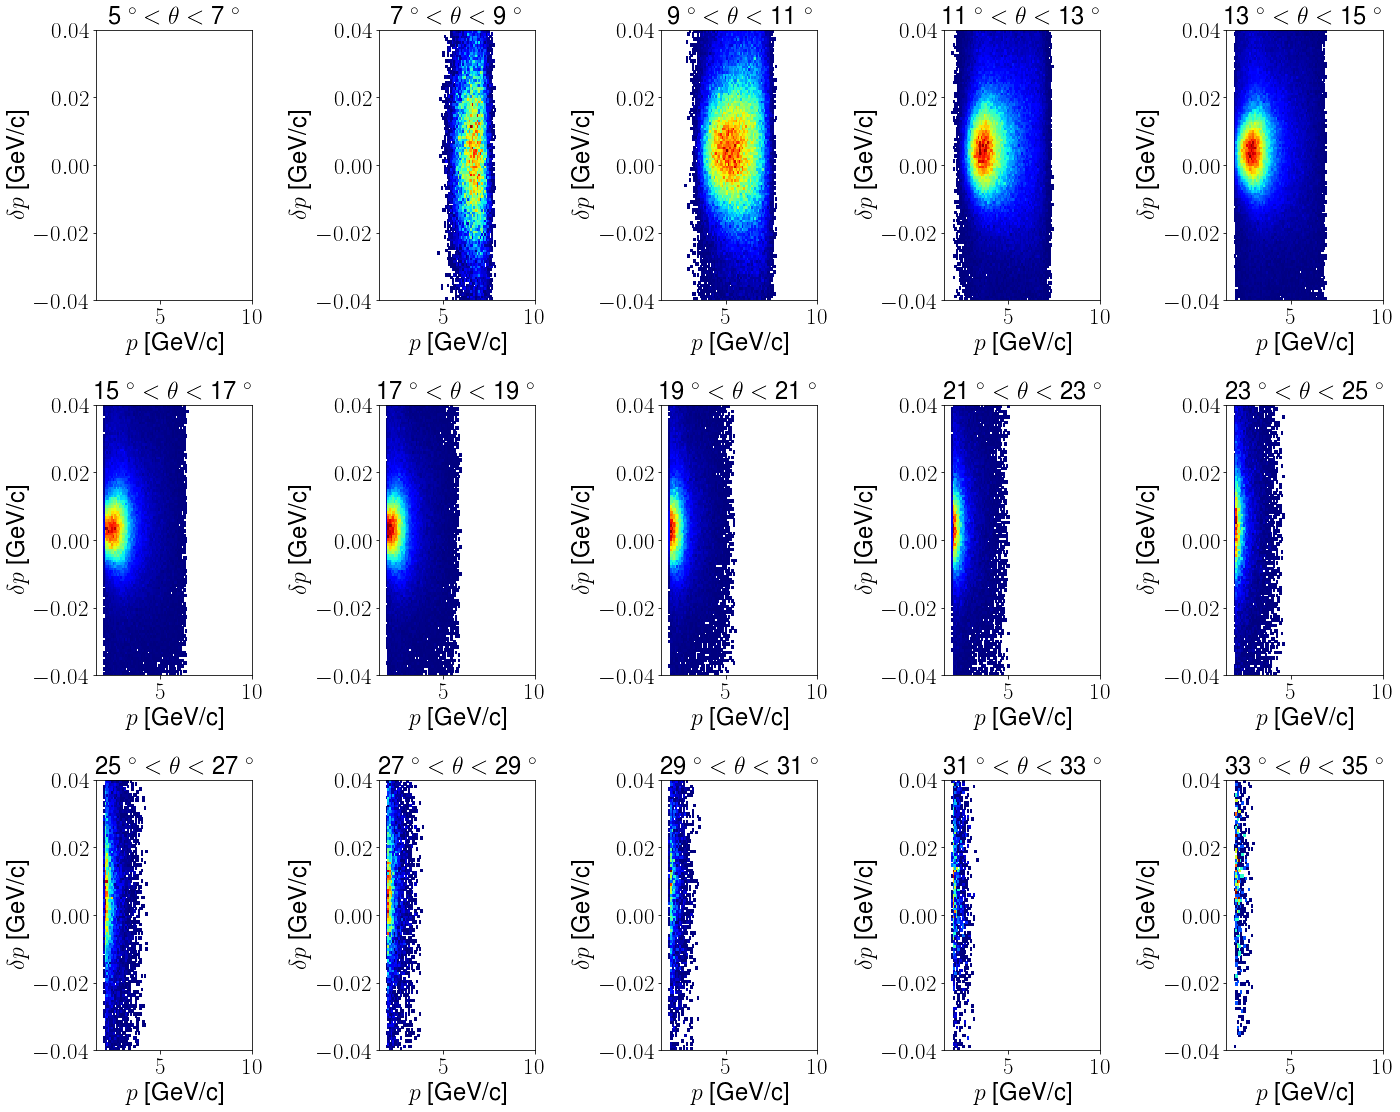

In [94]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Etheta"])
        thetaCond = (inbending.Etheta >= 2*ind+5) & (inbending.Etheta < 2*ind+7)
        axs[row, col].hist2d(inbending.loc[thetaCond, "Ep"], inbending.loc[thetaCond, "GenEp"] - inbending.loc[thetaCond, "Ep"], bins = [np.linspace(1.5, 10, 101), np.linspace(-0.04, 0.04, 101)], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         param = [0, -8, -3 ]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4([0, -2, -3], np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+5)+" "+degree + r" $<\theta<$ " + str(2*ind+7)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("electron_inb_mom.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


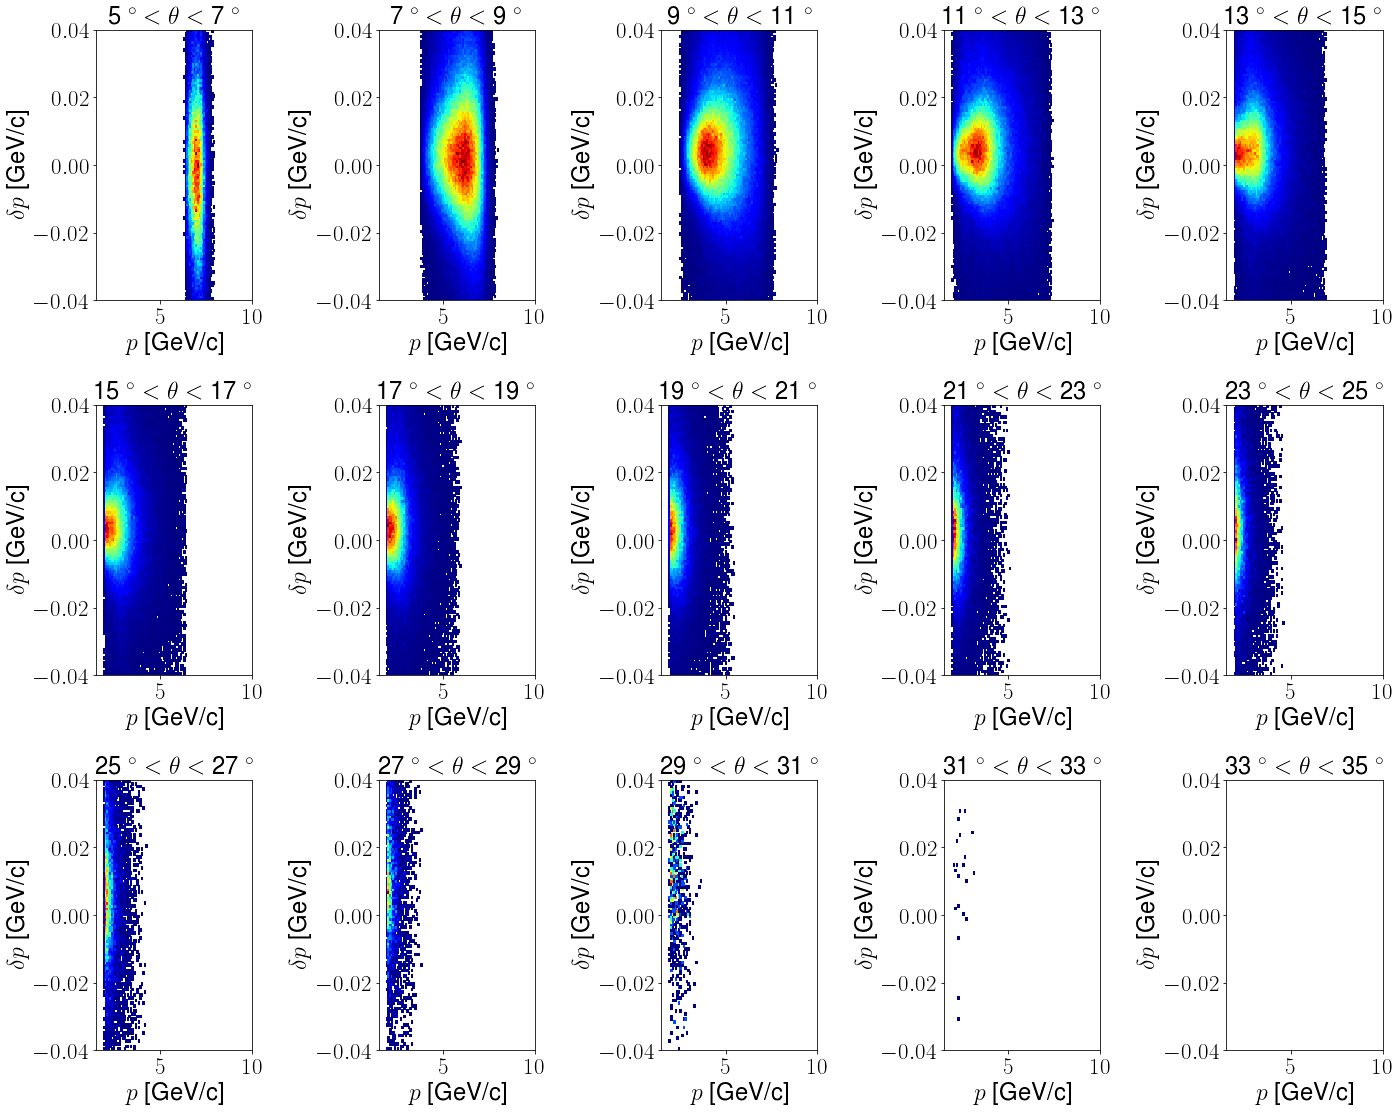

In [95]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Etheta"])
        thetaCond = (outbending.Etheta >= 2*ind+5) & (outbending.Etheta < 2*ind+7)
        axs[row, col].hist2d(outbending.loc[thetaCond, "Ep"], outbending.loc[thetaCond, "GenEp"] - outbending.loc[thetaCond, "Ep"], bins = [np.linspace(1.5, 10, 101), np.linspace(-0.04, 0.04, 101)], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         param = [0, -8, -3 ]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4([0, -2, -3], np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+5)+" "+degree + r" $<\theta<$ " + str(2*ind+7)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("electron_outb_mom.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


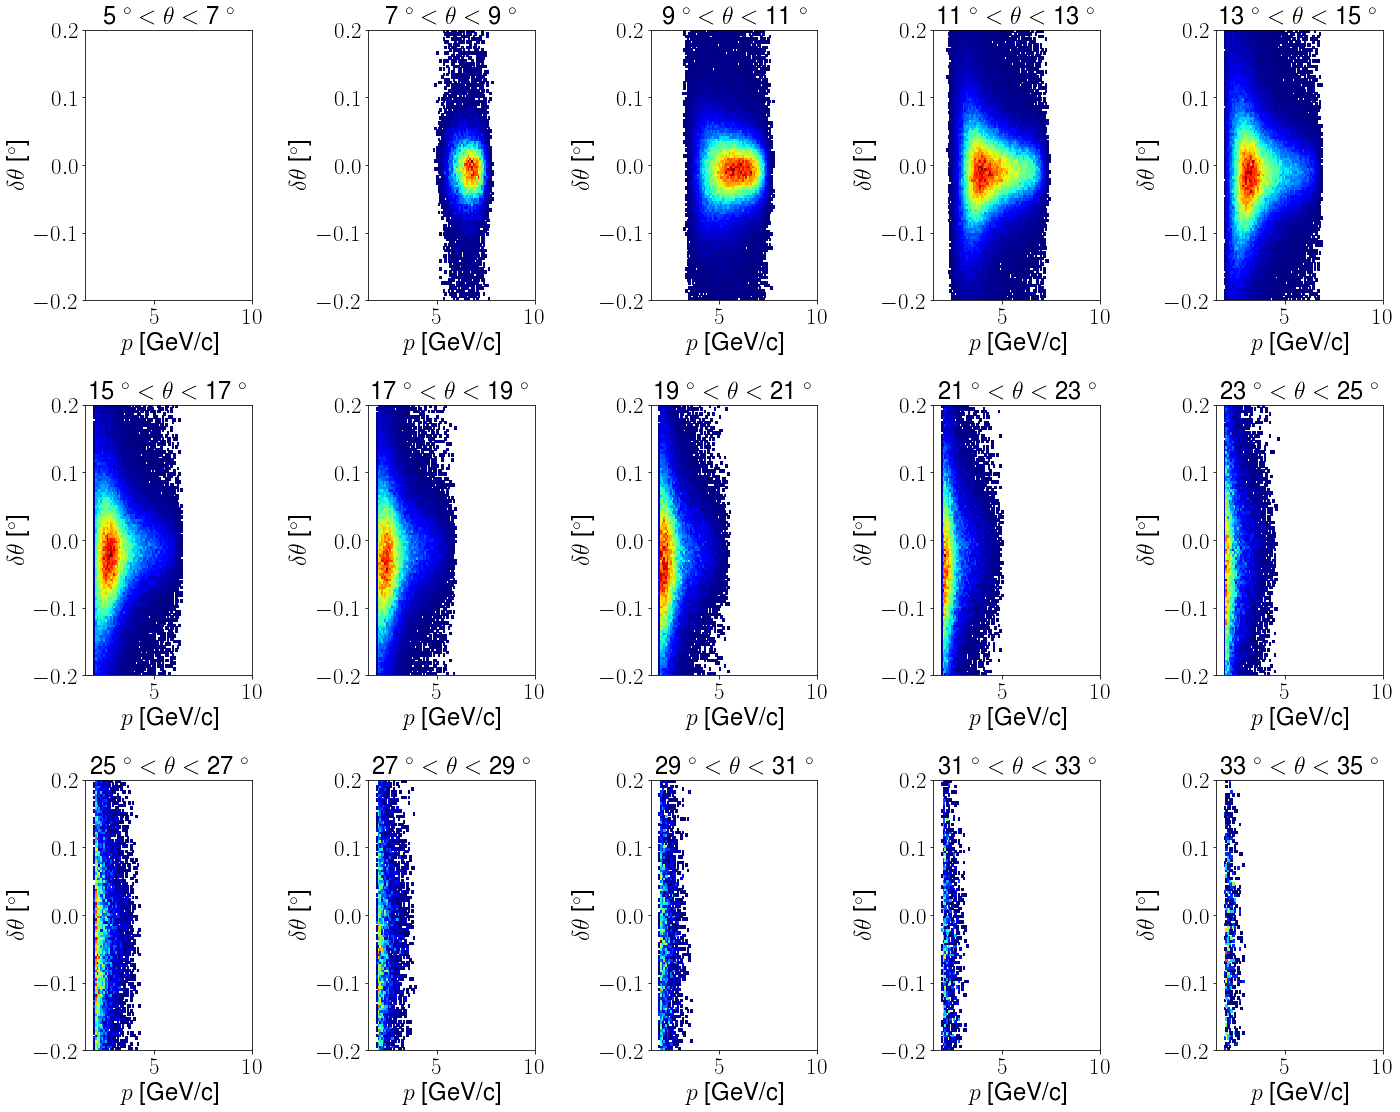

In [96]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Etheta"])
        thetaCond = (inbending.Etheta >= 2*ind+5) & (inbending.Etheta < 2*ind+7)
        axs[row, col].hist2d(inbending.loc[thetaCond, "Ep"], inbending.loc[thetaCond, "GenEtheta"] - inbending.loc[thetaCond, "Etheta"], bins = [np.linspace(1.5, 10, 101), np.linspace(-0.2, 0.2, 101)], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         param = [0, -8, -3 ]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4([0, -2, -3], np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+5)+" "+degree + r" $<\theta<$ " + str(2*ind+7)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("electron_inb_theta.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


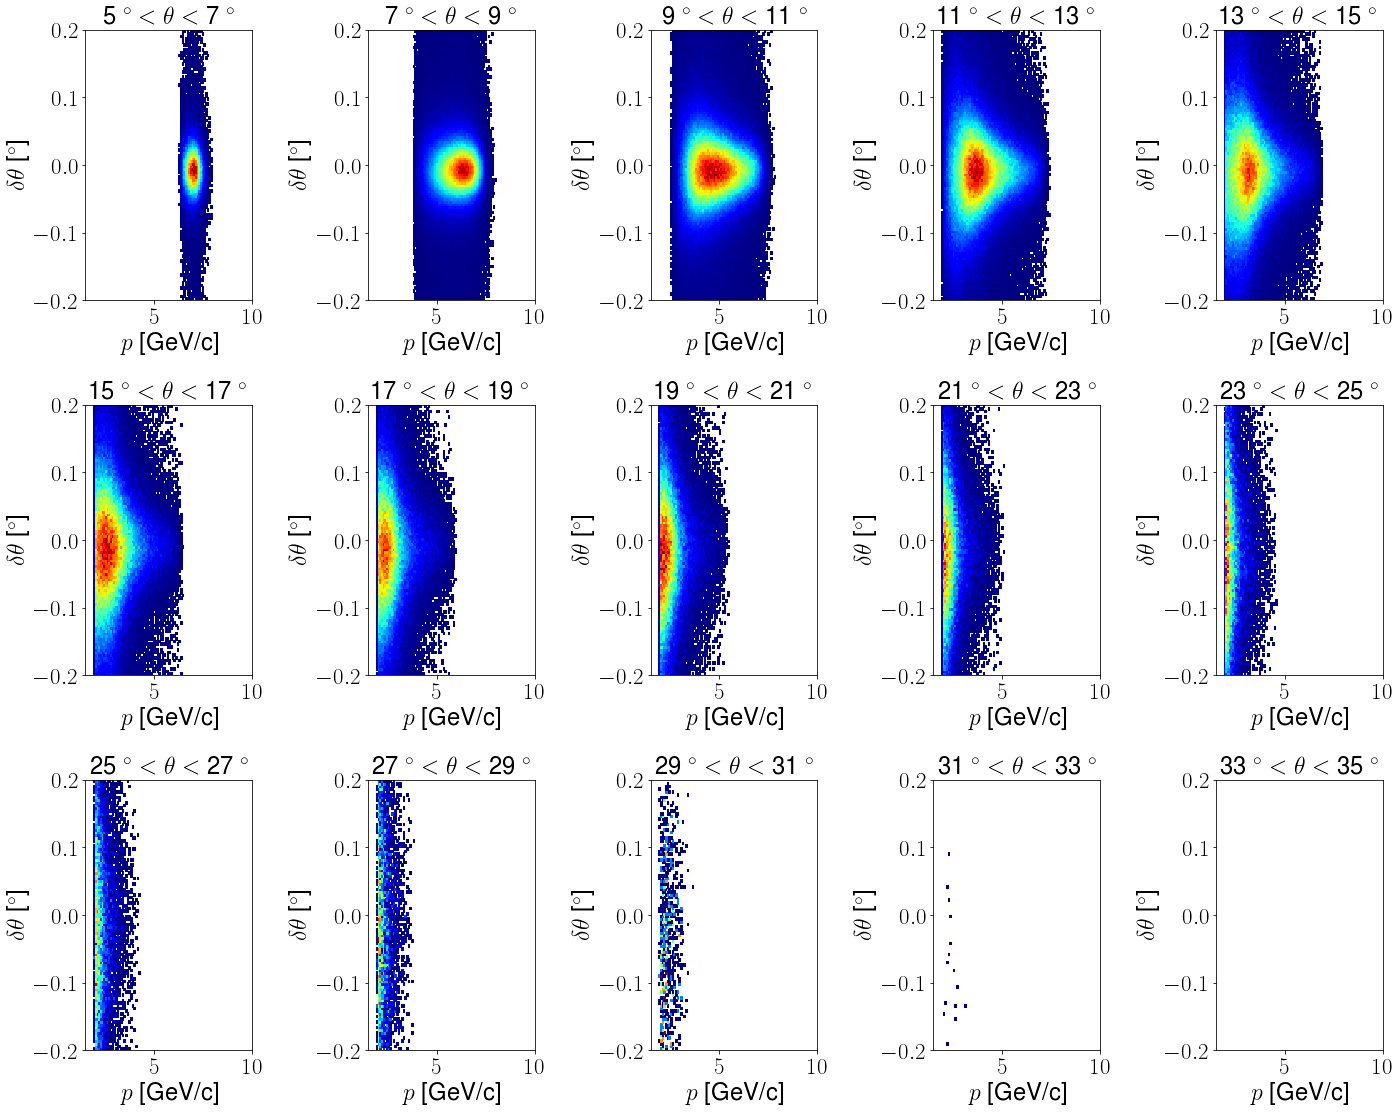

In [97]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Etheta"])
        thetaCond = (outbending.Etheta >= 2*ind+5) & (outbending.Etheta < 2*ind+7)
        axs[row, col].hist2d(outbending.loc[thetaCond, "Ep"], outbending.loc[thetaCond, "GenEtheta"] - outbending.loc[thetaCond, "Etheta"], bins = [np.linspace(1.5, 10, 101), np.linspace(-0.2, 0.2, 101)], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         param = [0, -8, -3 ]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4([0, -2, -3], np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+5)+" "+degree + r" $<\theta<$ " + str(2*ind+7)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("electron_outb_theta.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


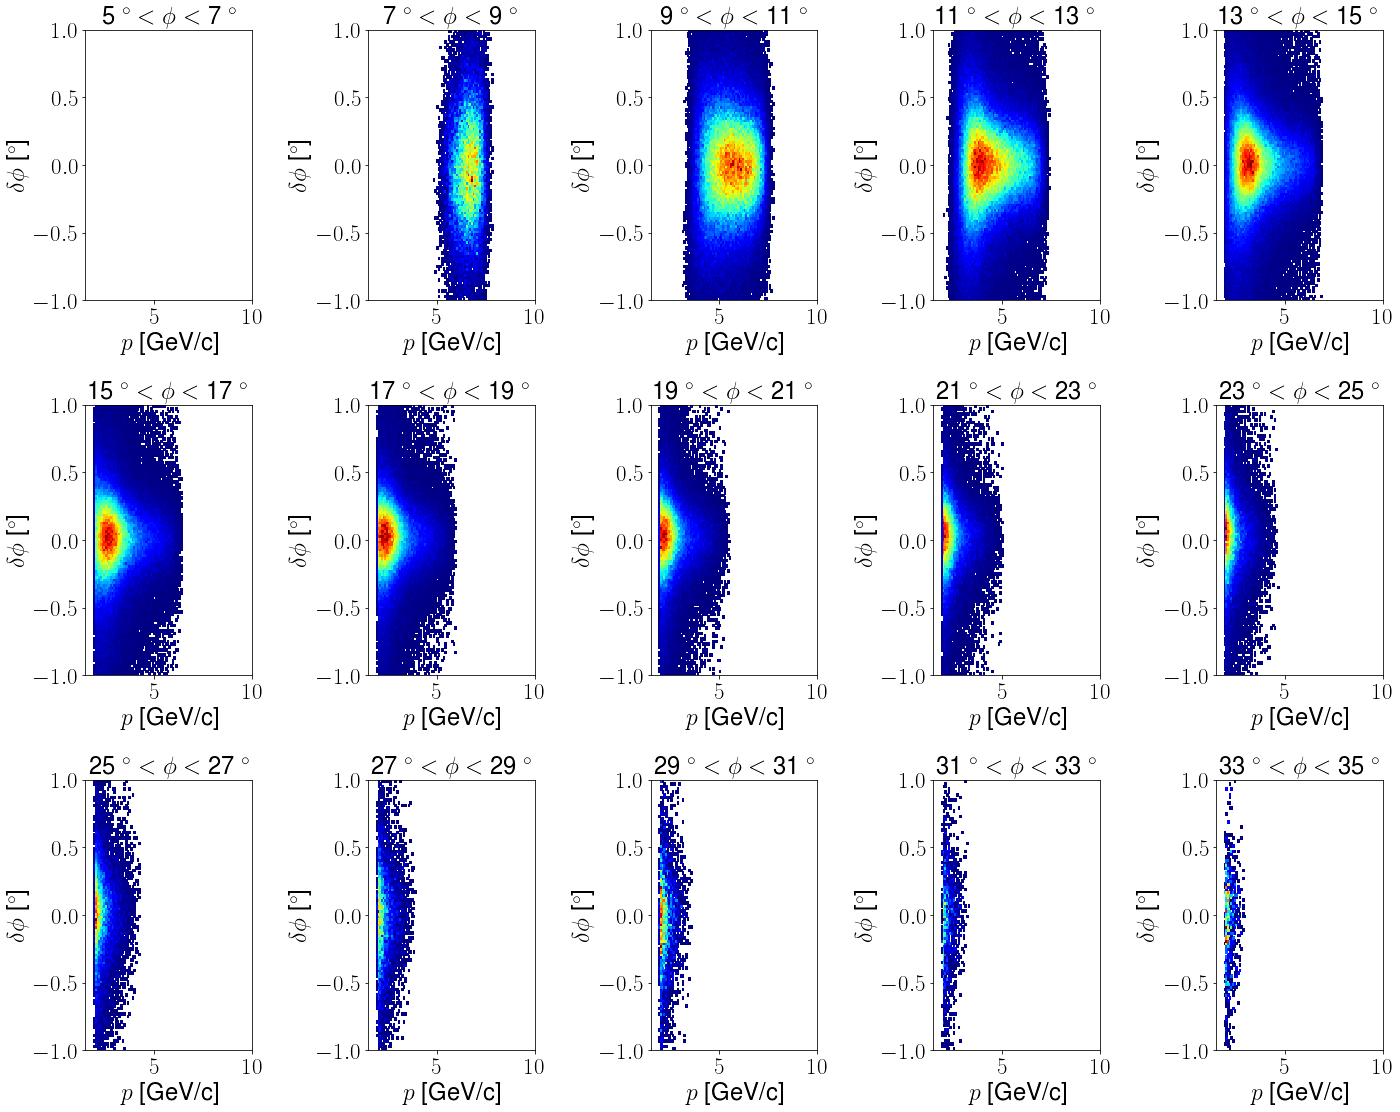

In [98]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Etheta"])
        thetaCond = (inbending.Etheta >= 2*ind+5) & (inbending.Etheta < 2*ind+7)
        axs[row, col].hist2d(inbending.loc[thetaCond, "Ep"], inbending.loc[thetaCond, "GenEphi"] - inbending.loc[thetaCond, "Ephi"], bins = [np.linspace(1.5, 10, 101), np.linspace(-1, 1, 101)], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         param = [0, -8, -3 ]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4([0, -2, -3], np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+5)+" "+degree + r" $<\phi<$ " + str(2*ind+7)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("electron_inb_phi.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


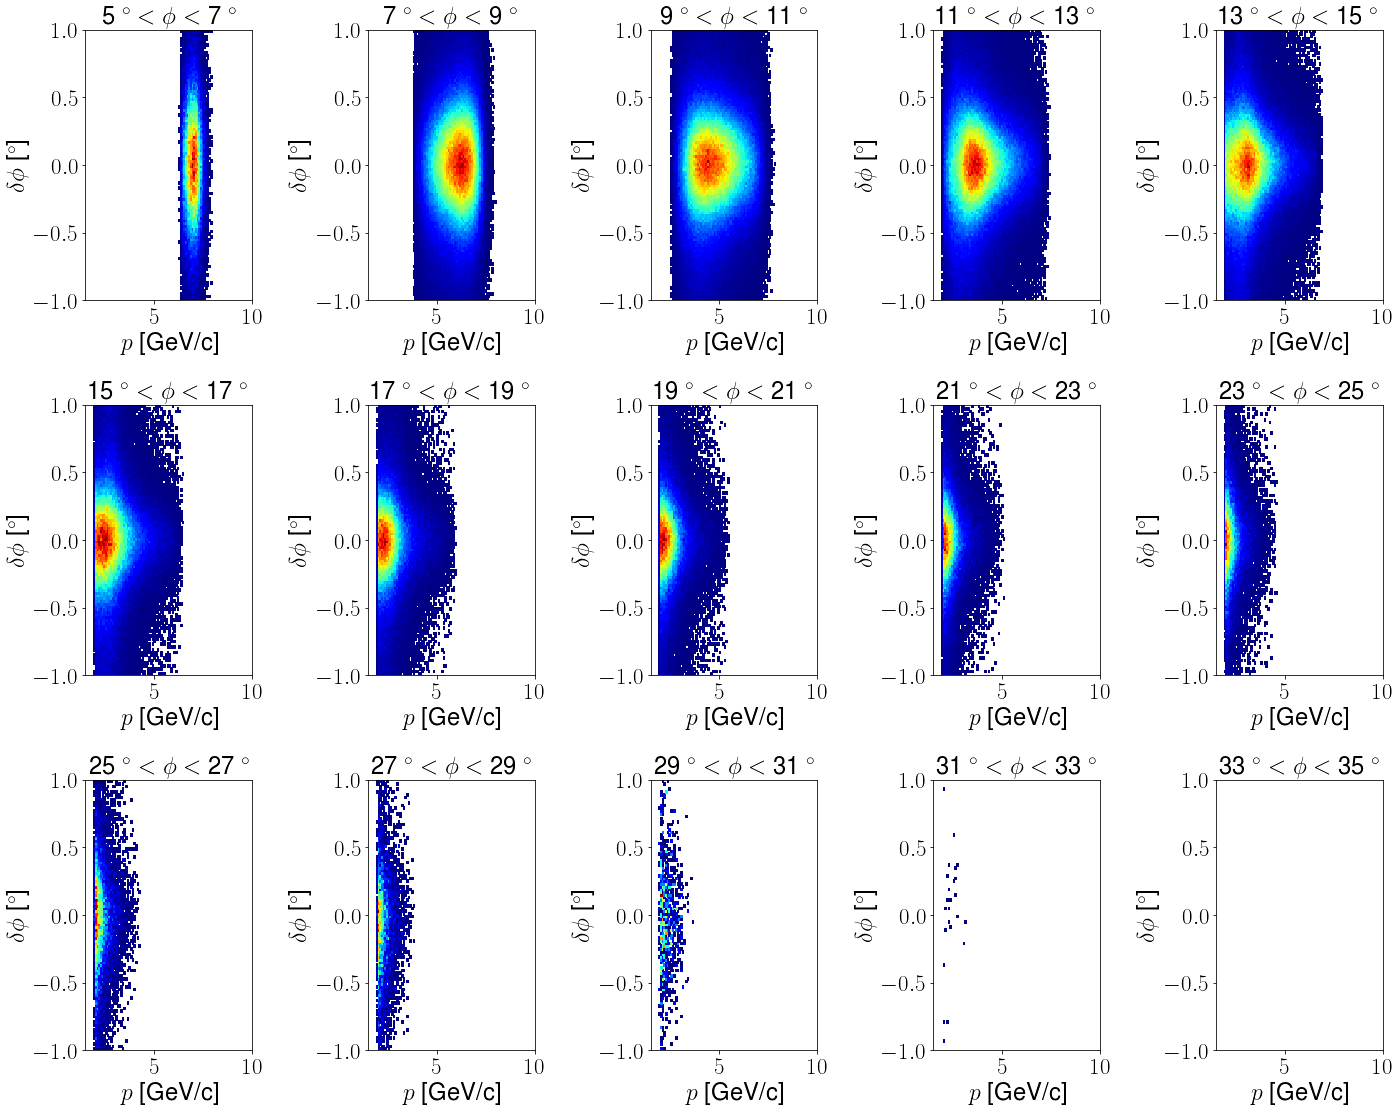

In [99]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Etheta"])
        thetaCond = (outbending.Etheta >= 2*ind+5) & (outbending.Etheta < 2*ind+7)
        axs[row, col].hist2d(outbending.loc[thetaCond, "Ep"], outbending.loc[thetaCond, "GenEphi"] - outbending.loc[thetaCond, "Ephi"], bins = [np.linspace(1.5, 10, 101), np.linspace(-1, 1, 101)], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         param = [0, -8, -3 ]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4([0, -2, -3], np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+5)+" "+degree + r" $<\phi<$ " + str(2*ind+7)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("electron_outb_phi.pdf")

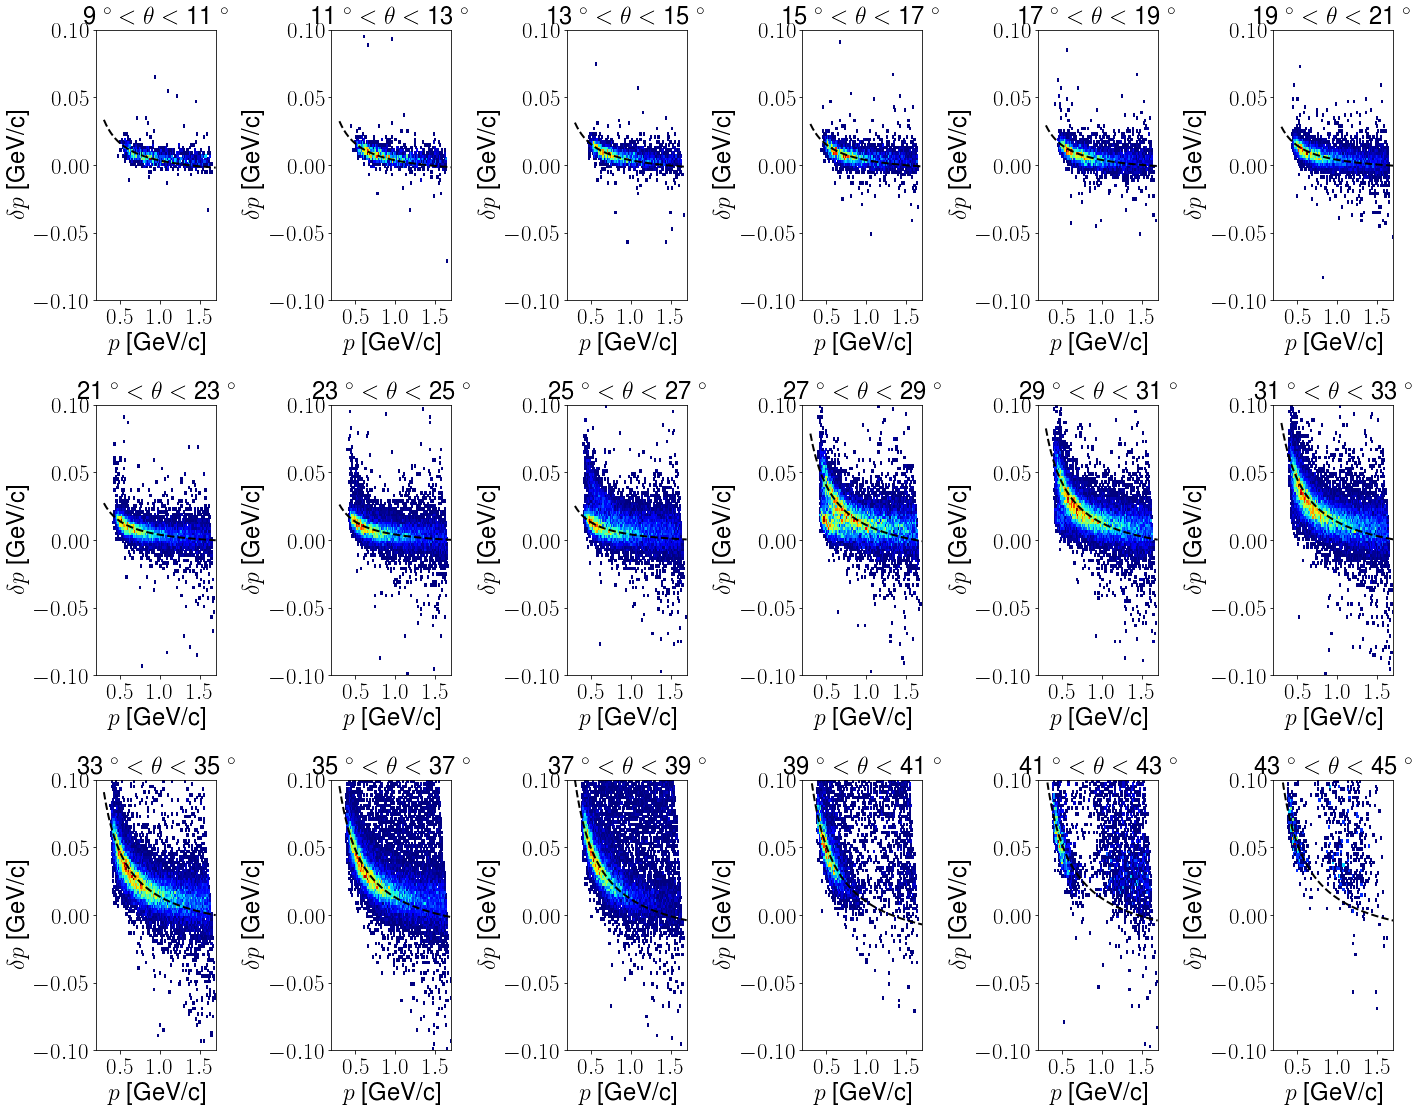

In [83]:
theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
                  [-0.0123049 + 0.00028887*theta, -0.138227479 + 8.07557430*0.001*theta -1.34807927*0.0001*theta*theta, -0.0275235])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
                  [0.01528006 - 0.00024079*theta, 5.65817597*0.01 -2.36903348*0.001*theta + 4.93780046*0.00001*theta*theta, 0.03998975])
params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPp"] - inbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta<$ " + str(ind*2+2+9)+" "+degree)
plt.tight_layout()
plt.savefig("protonFD_inb_mom.pdf")
# plt.savefig("correction_p_result.pdf")

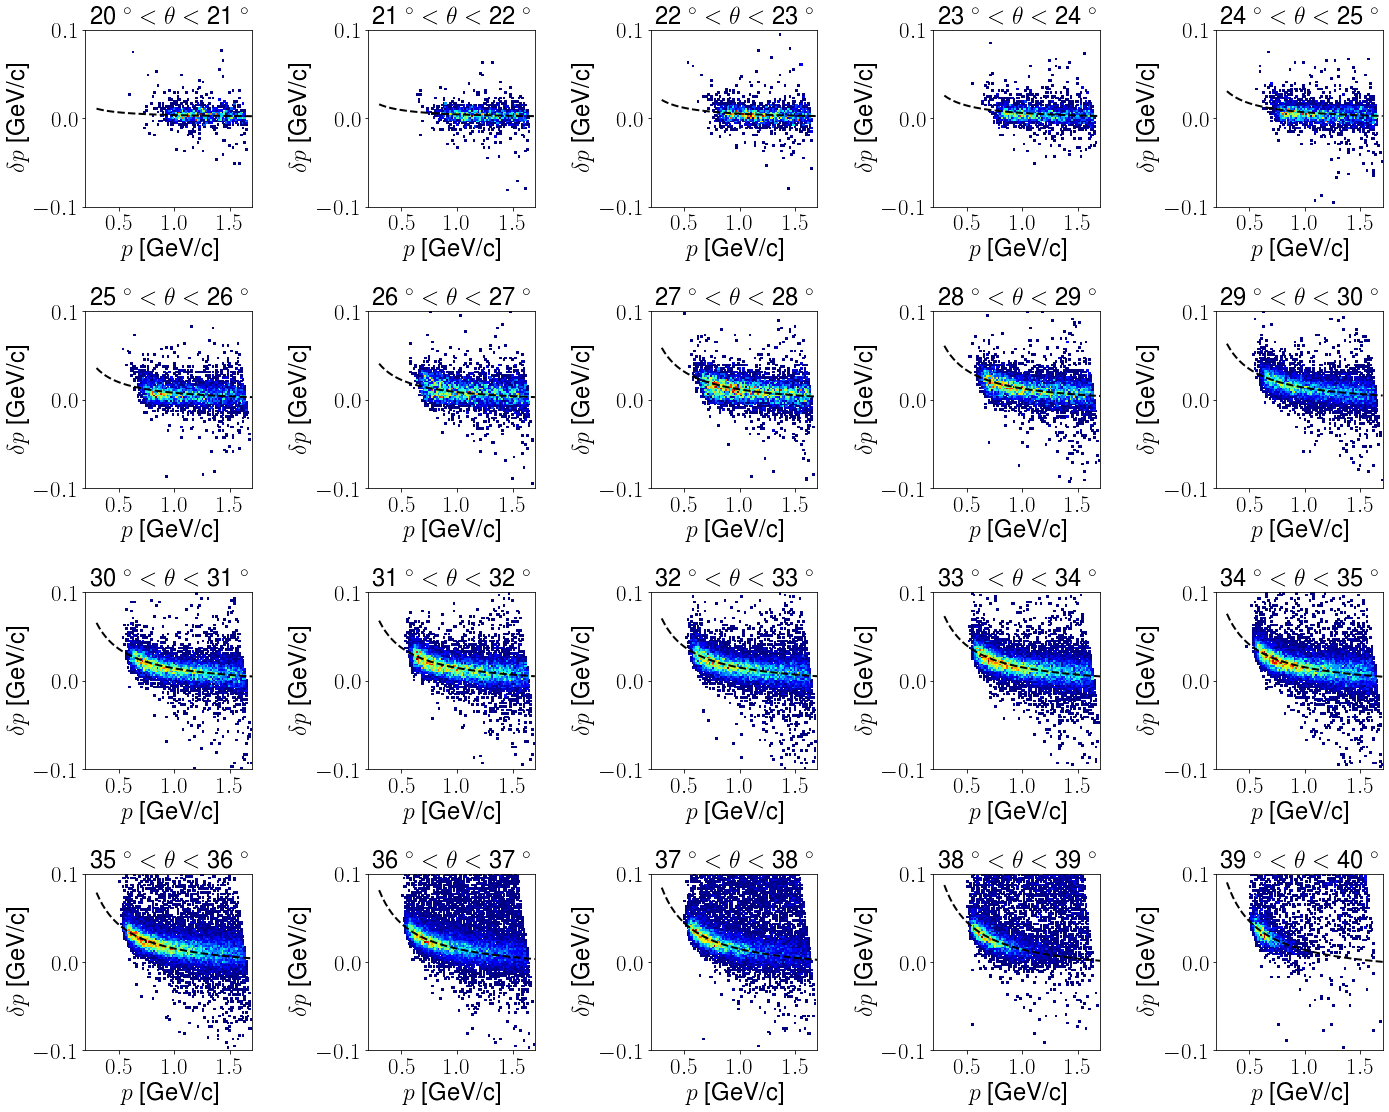

In [84]:
theta = np.linspace(0,19,20) + 20.5
const_FD = np.select([theta<27, (theta>=27)],
              [0.02067157-0.0009827*theta, -0.11216694 + 0.0069912*theta - 0.00011733 * theta * theta])
coeff_FD = np.select([theta<27, (theta>=27)],
              [-0.03334437+0.00177781*theta, 0.0402797945 - 0.00197220505*theta + 4.50918200*10**(-5) * theta * theta])

params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(4,5, figsize=(20,16))
for row in range(4):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= ind+20) & (outbendingFD.Ptheta < ind+21)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPp"] - outbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind+20)+" "+degree + r" $<\theta<$ " + str(ind+21)+" "+degree)
plt.tight_layout()
plt.savefig("protonFD_outb_mom.pdf")
# plt.savefig("correction_p_result.pdf")

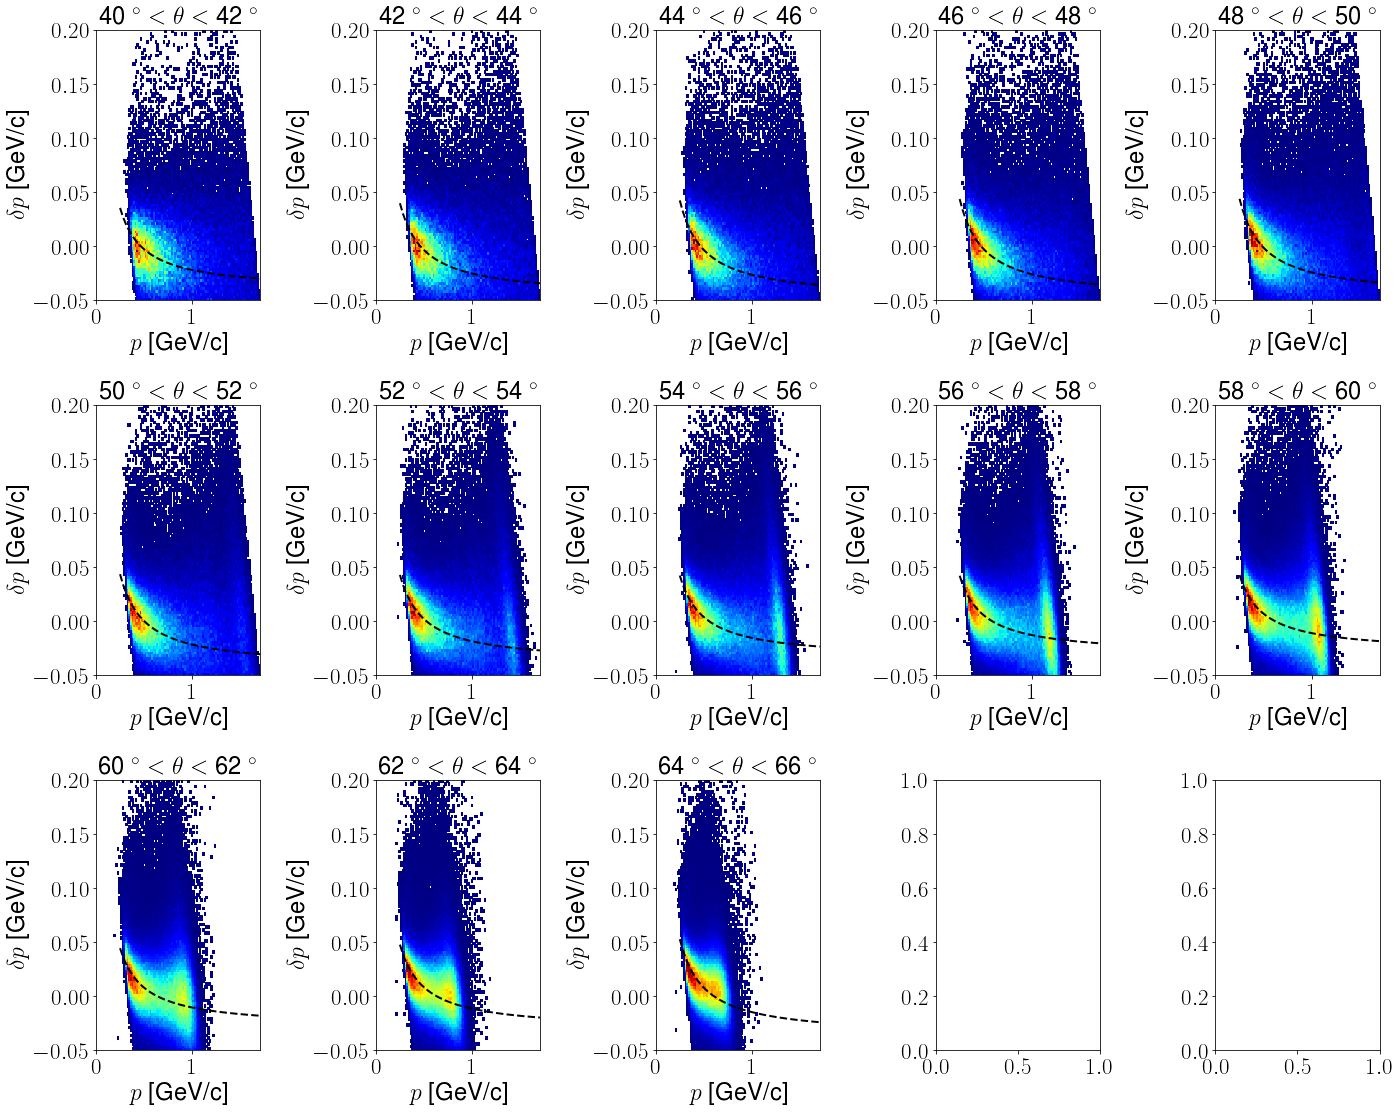

In [85]:
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPp"] - outbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_inb_mom.pdf")

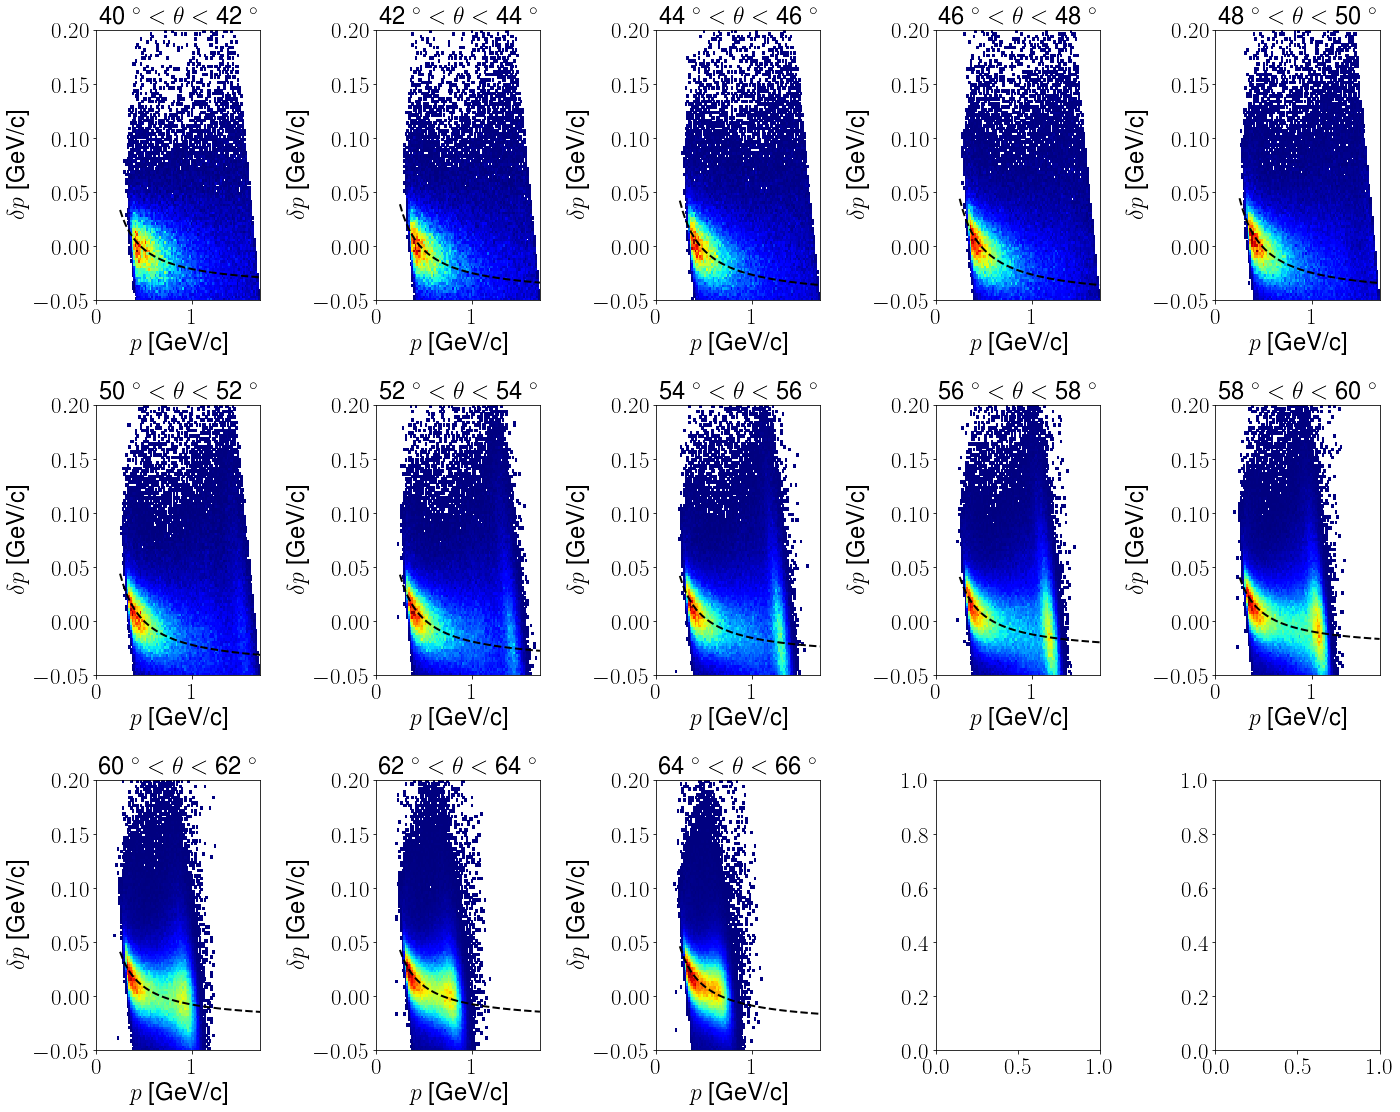

In [86]:
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.92657376 - 0.113836734*theta + 0.00215038526*theta**2 - 1.32525053 * 10**(-5)*theta**3
coeff_CD = -0.755650043 + 0.0445538936*theta - 8.38241864*10**(-4)*theta*theta + 5.16887255 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPp"] - outbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_outb_mom.pdf")

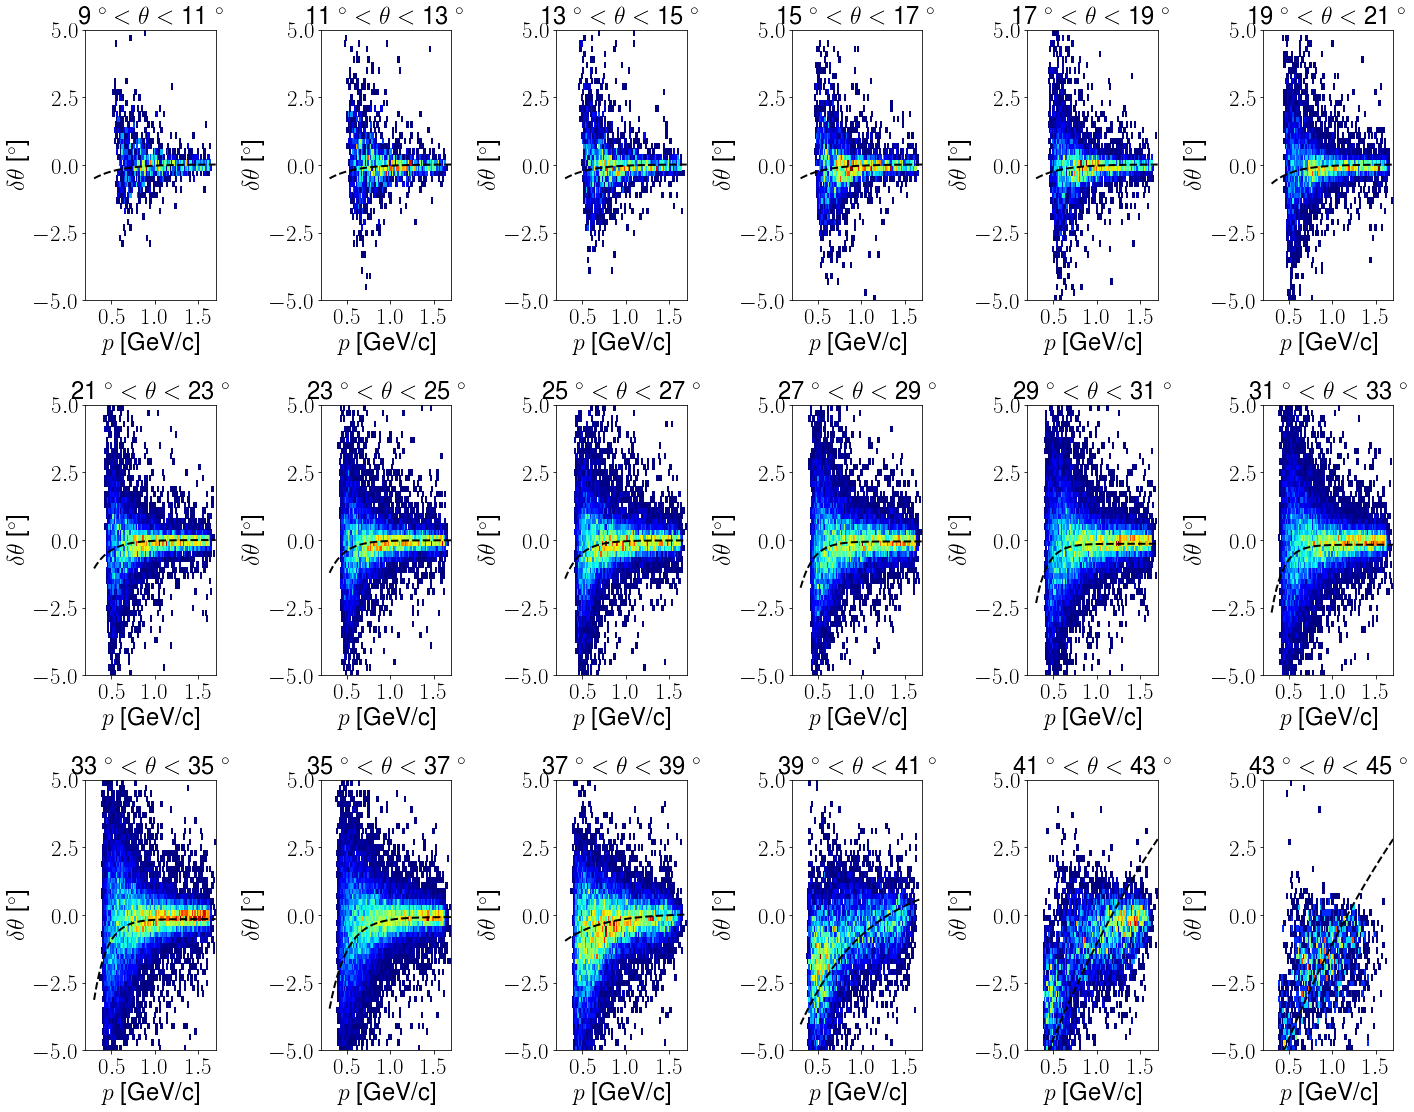

In [87]:
theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [2.63643690*0.01, 0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 6.91308654 - 0.439839300*theta +6.83075548*0.001*theta*theta, 1.59424606, 1.47198581*10])
coeff_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [-1.46440415, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 682.909471 - 43.9551177 * theta + 0.682383790 * theta * theta, -8.19627119, -23.55701865])    
coeff2_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [-3.47690993, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta, 100.33995753 - 6.96600416*theta + 0.11223046*theta*theta, -1.25261927, -0.40113733])    
params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPtheta"] - inbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
plt.savefig("protonFD_inb_theta.pdf")
# plt.savefig("correction_p_result.pdf")


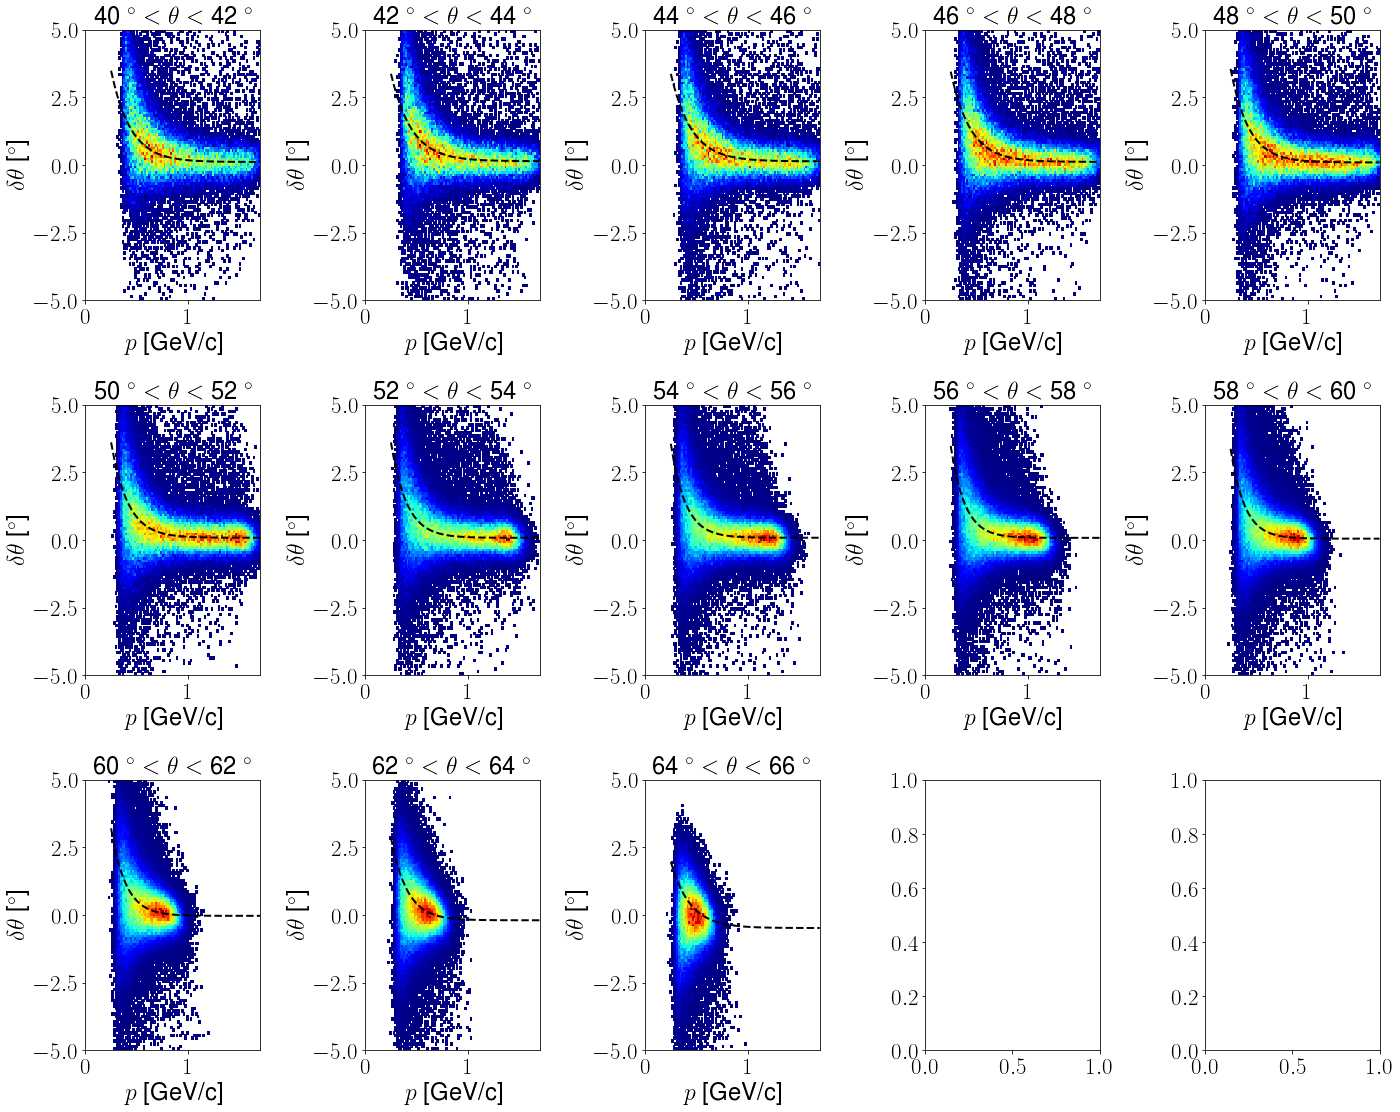

In [88]:
theta = np.linspace(0, 14, 15)*2+41
const_CD = -1.09849291*100 + 8.86664014 * theta - 0.26643881 * theta**2 + 3.53814210 * 10**(-3) * theta**3 - 1.75297107 * 10**(-5) * theta**4
coeff_CD = 9.52034523*100 -5.74808292 * 10 * theta + 1.15386949 * theta**2 - 7.57970373 * 0.001 * theta**3
coeff2_CD = -2.00387313*100 + 1.18979079 * 10 * theta - 2.37730217*0.1 * theta**2 + 1.55153003*0.001*theta**3
params_theta = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPtheta"] - inbendingCD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
plt.savefig("protonCD_inb_theta.pdf")

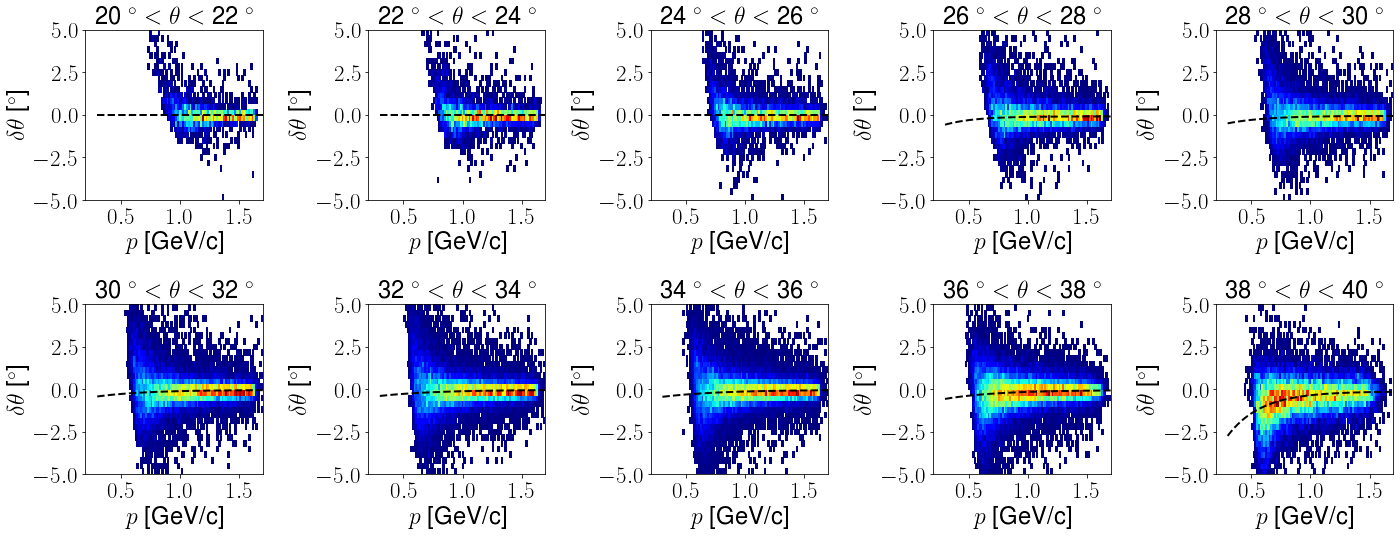

In [89]:
theta = np.linspace(0,19,20)*2 + 21
const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -1.79343987 +0.105559096 *theta + -0.00157174358*theta*theta, -0.123044632])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -27.4344526 + 1.61037587* theta - 0.0242300381* theta * theta, -7.52117236])    
coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -45.2983842 +2.51745350*theta - 0.0365942178*theta*theta, -3.52825441])    
params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPtheta"] - outbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
plt.savefig("protonFD_outb_theta.pdf")
# plt.savefig("correction_p_result.pdf")

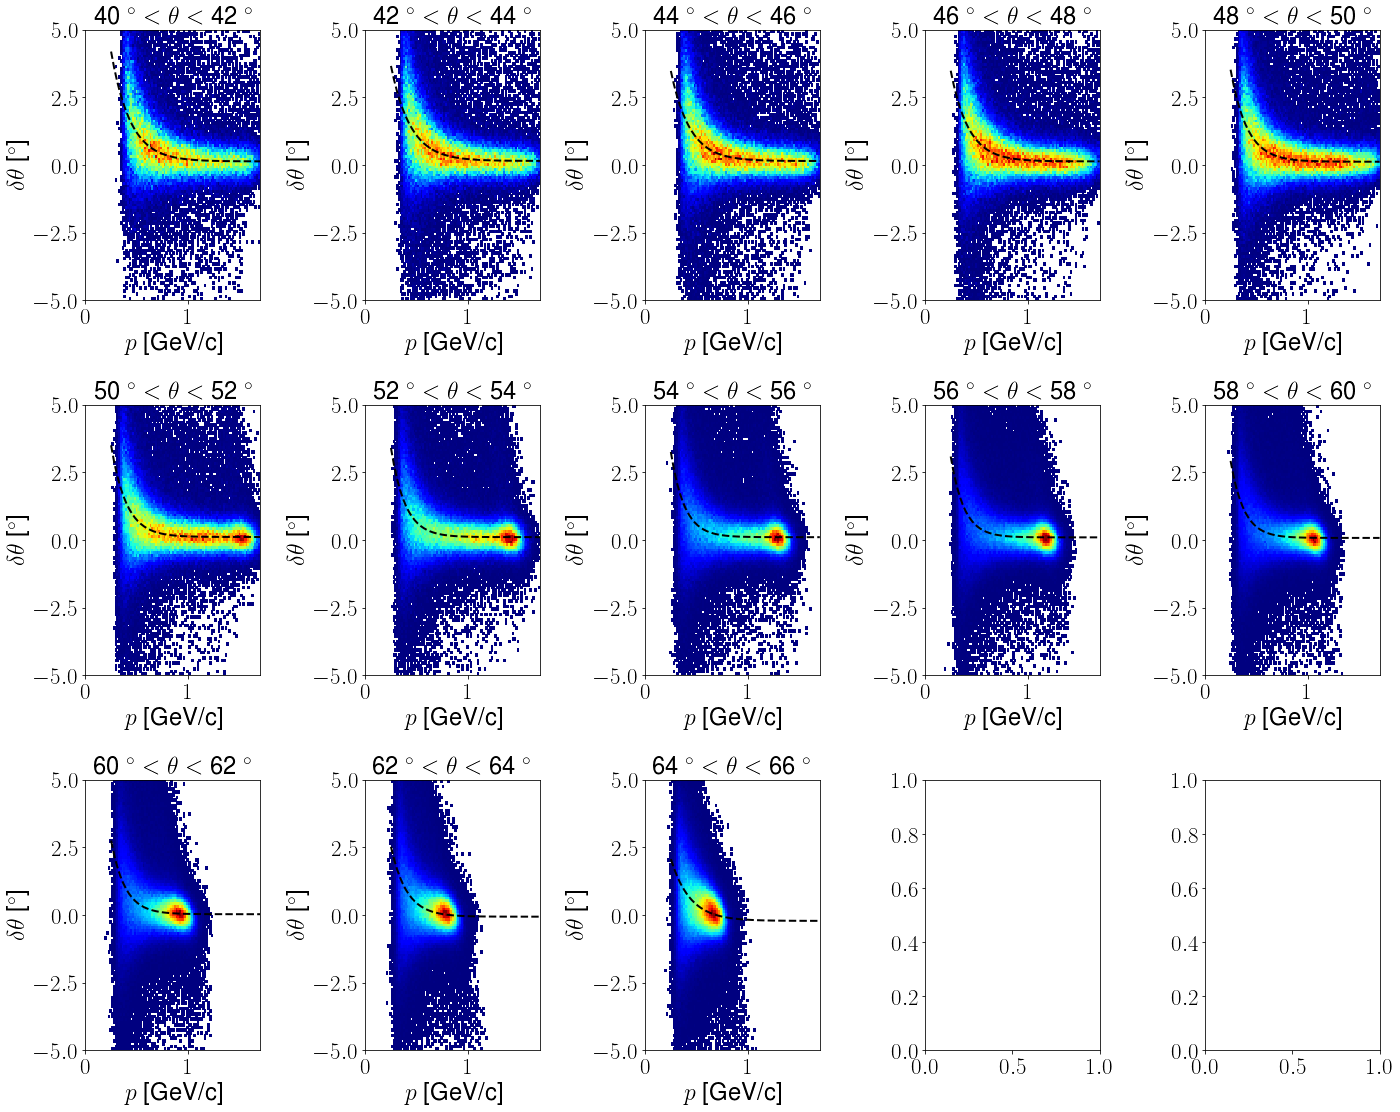

In [90]:
theta = np.linspace(0, 14, 15)*2+41
const_CD = -5.79024055*10 + 4.67197531 * theta - 0.140156897 * theta**2 + 1.85853057 * 10**(-3) * theta**3 - 9.19989908 * 10**(-6) * theta**4
coeff_CD = 2.99700765*1000 - 2.18027982 * 10**2 * theta + 5.84757503 * theta**2 - 6.80409195 * 0.01 * theta**3 + 2.89244618 * 0.0001 * theta**4
coeff2_CD = -1.82237904*100 + 1.10153549 * 10 * theta - 2.24699931*0.1 * theta**2 + 1.49390960*0.001*theta**3
params_theta = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPtheta"] - outbendingCD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
plt.savefig("protonCD_outb_theta.pdf")

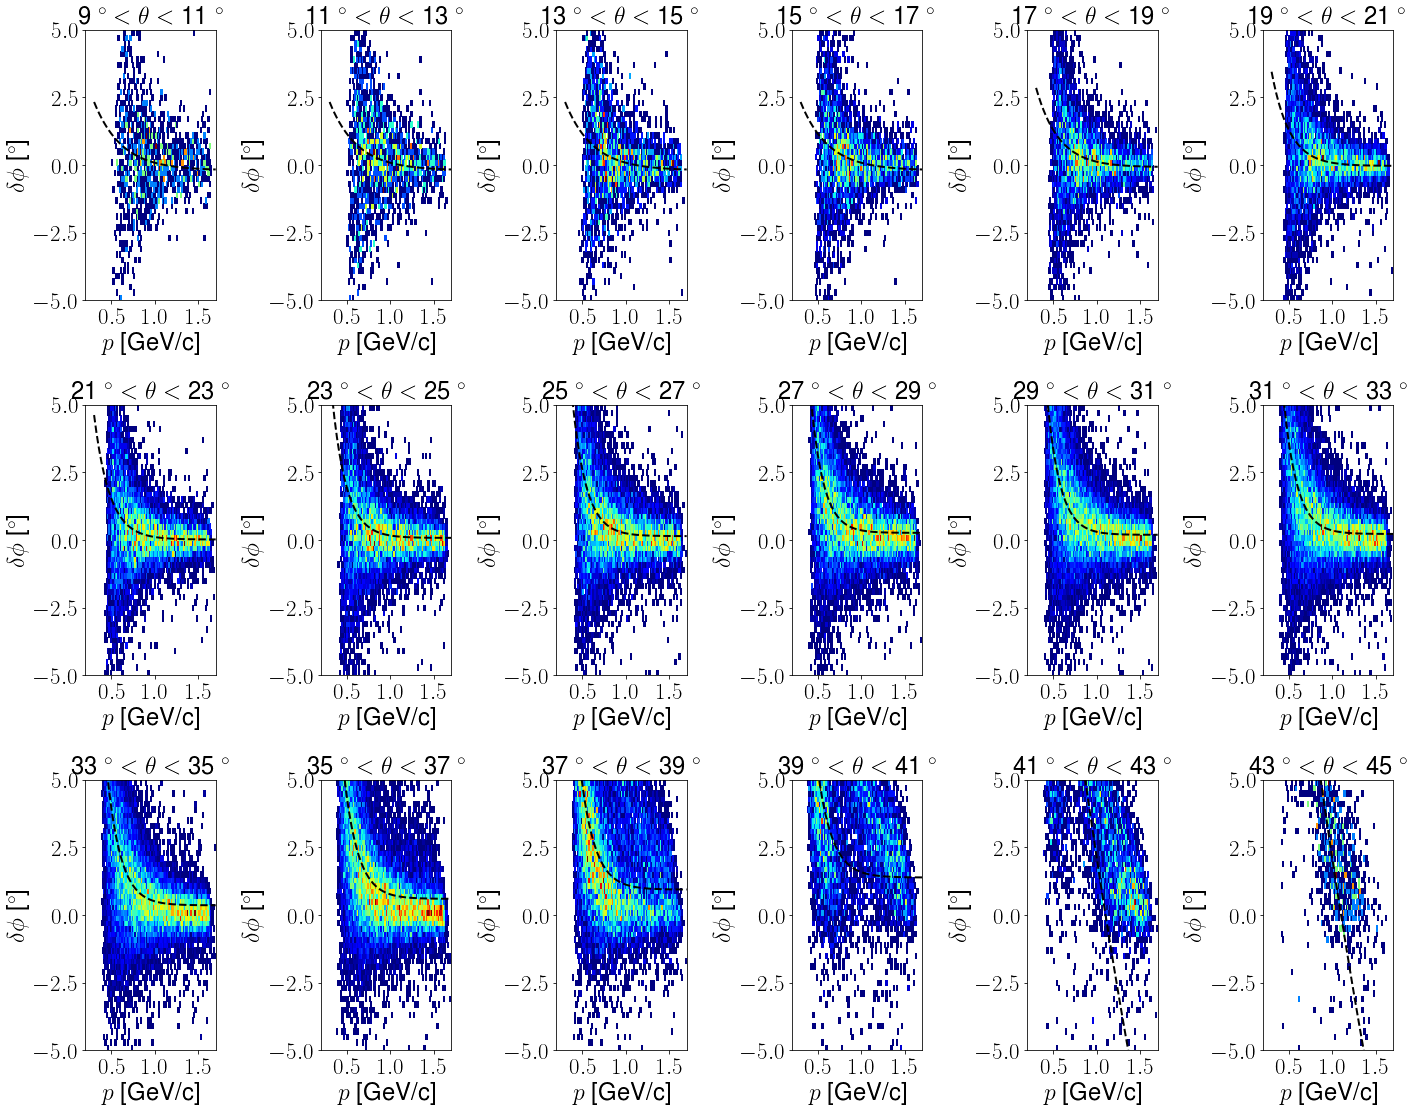

In [91]:
theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [-0.190662844, -0.20725736 -0.00675627 *theta + 0.0007863*theta*theta, 12.1881698 - 0.78906294*theta +0.01297898*theta*theta, -4.59743066*10])
coeff_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [6.48745941, 142.96379788  -16.66339055*theta + 0.51311212*theta*theta, 2.1853046 + 5.78521226 * theta - 0.09727796 * theta * theta, 7.46969457*10])    
coeff2_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [-3.14646608, 17.39529095 -1.78403359*theta + 0.0335692*theta*theta, -1.03655317*10 + 0.161333213*theta -1.29625675*0.001*theta*theta, -4.41246899*0.1])    
params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPphi"] - inbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
plt.savefig("protonFD_inb_phi.pdf")
# plt.savefig("correction_p_result.pdf")


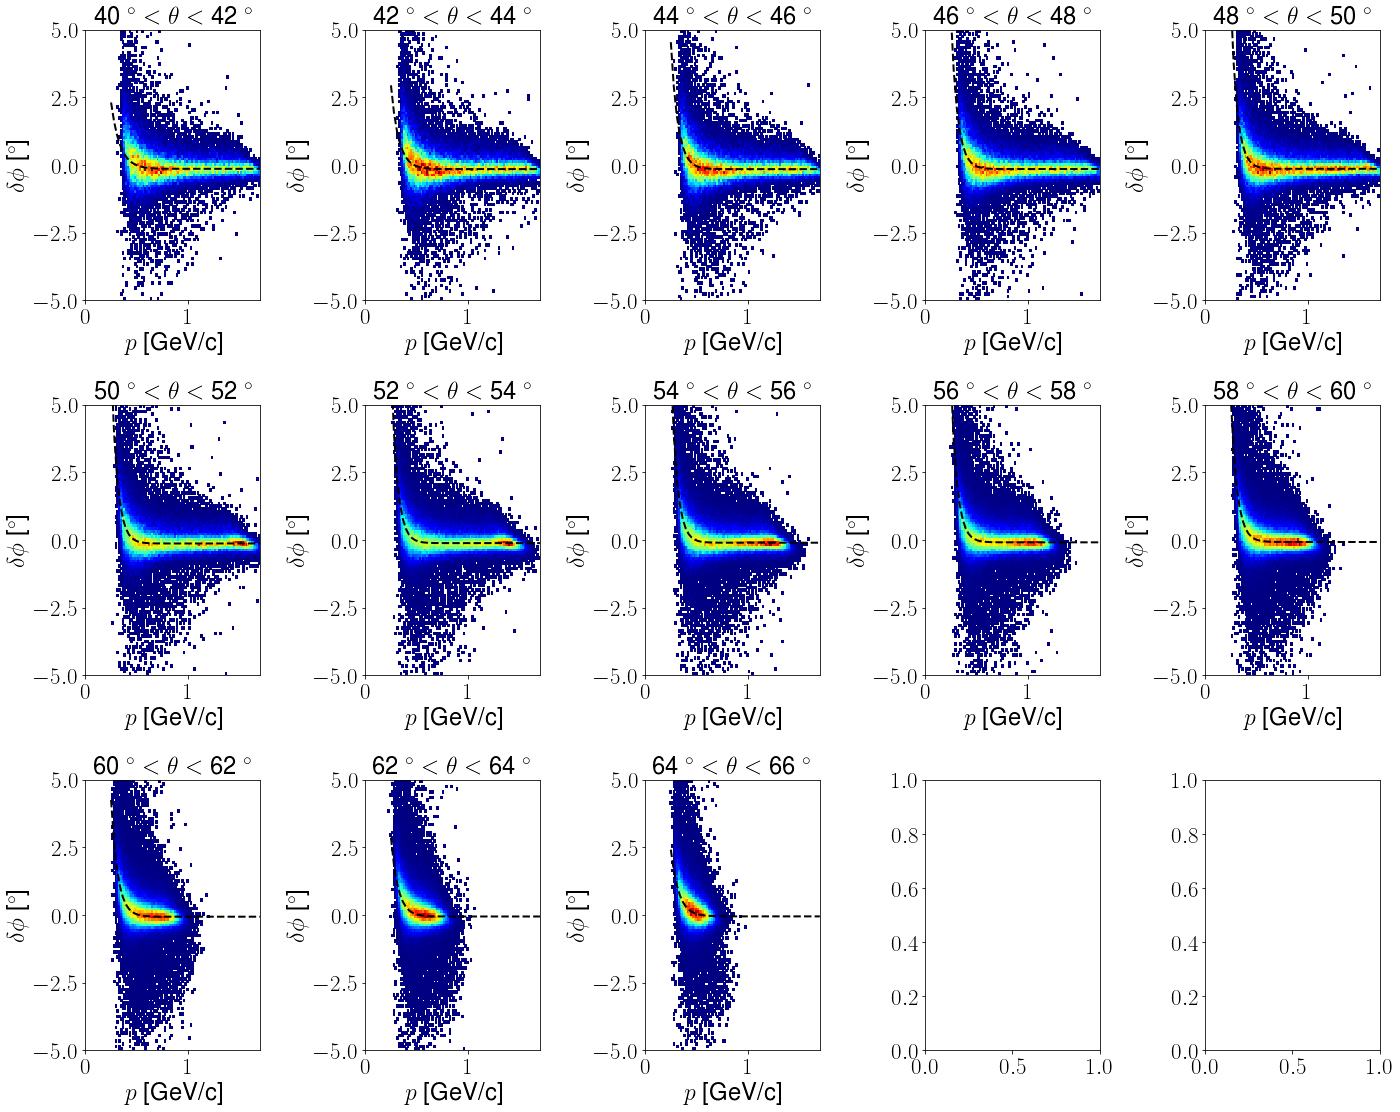

In [92]:
theta = np.linspace(0, 14, 15)*2+41
const_CD = 4.94546178 -3.26662886*0.1 * theta +  7.39069603 * 0.001 * theta**2 -6.83599356*10**(-5) * theta**3 + 2.12303103*10**(-7) * theta**4
coeff_CD = 1.72181613*10**(5) -1.36827111*10**(4) * theta + 4.00923146*10**(2) * theta**2 - 5.12792347 * theta**3 + 2.41793167*10**(-2) * theta**4
coeff2_CD =  1.20477219*10**(2) -5.86630228 * theta + 7.44007875*10**(-2) * theta**2 -2.42652473*10**(-4) * theta**3
params_theta = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPphi"] - inbendingCD.loc[thetaCond, "Pphi"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
plt.savefig("protonCD_inb_phi.pdf")

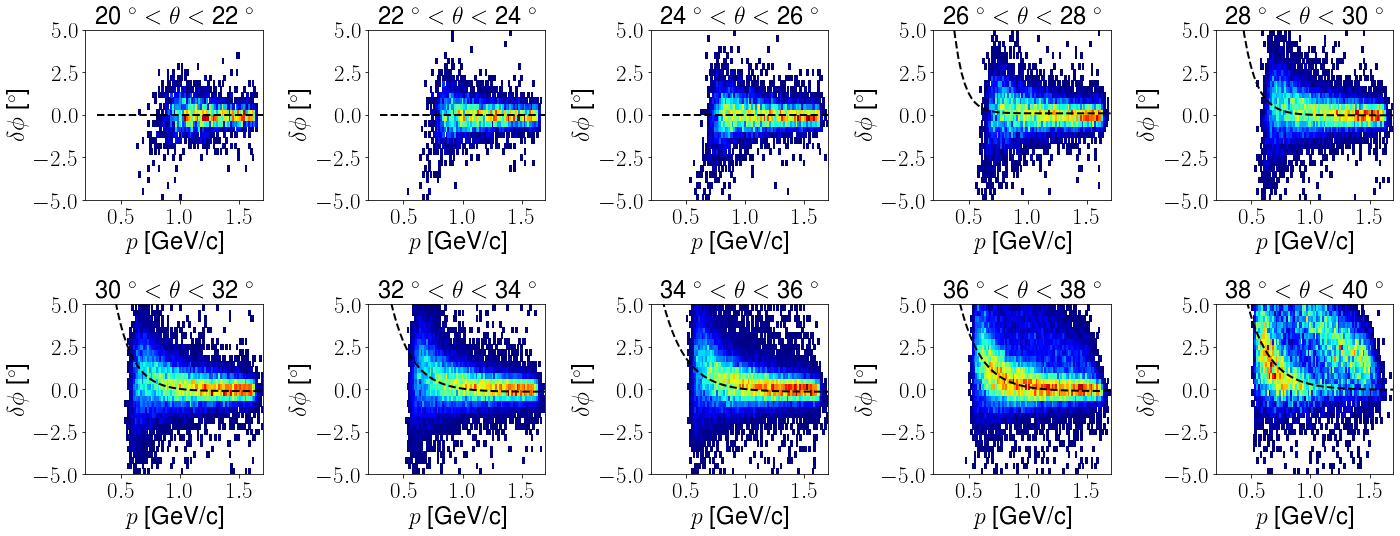

In [93]:
theta = np.linspace(0,19,20)*2 + 21
const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, 5.37967179 -0.324630795 *theta + 0.00476947696*theta*theta, -0.0224918574])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, 7.25038499*1000 + -413.586911* theta + 5.91815405 * theta * theta, 55.6319490])    
coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -124.626261 + 6.77668728*theta - 0.0960045129*theta*theta, -5.12646023])    
params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPphi"] - outbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
plt.savefig("protonFD_outb_phi.pdf")
# plt.savefig("correction_p_result.pdf")

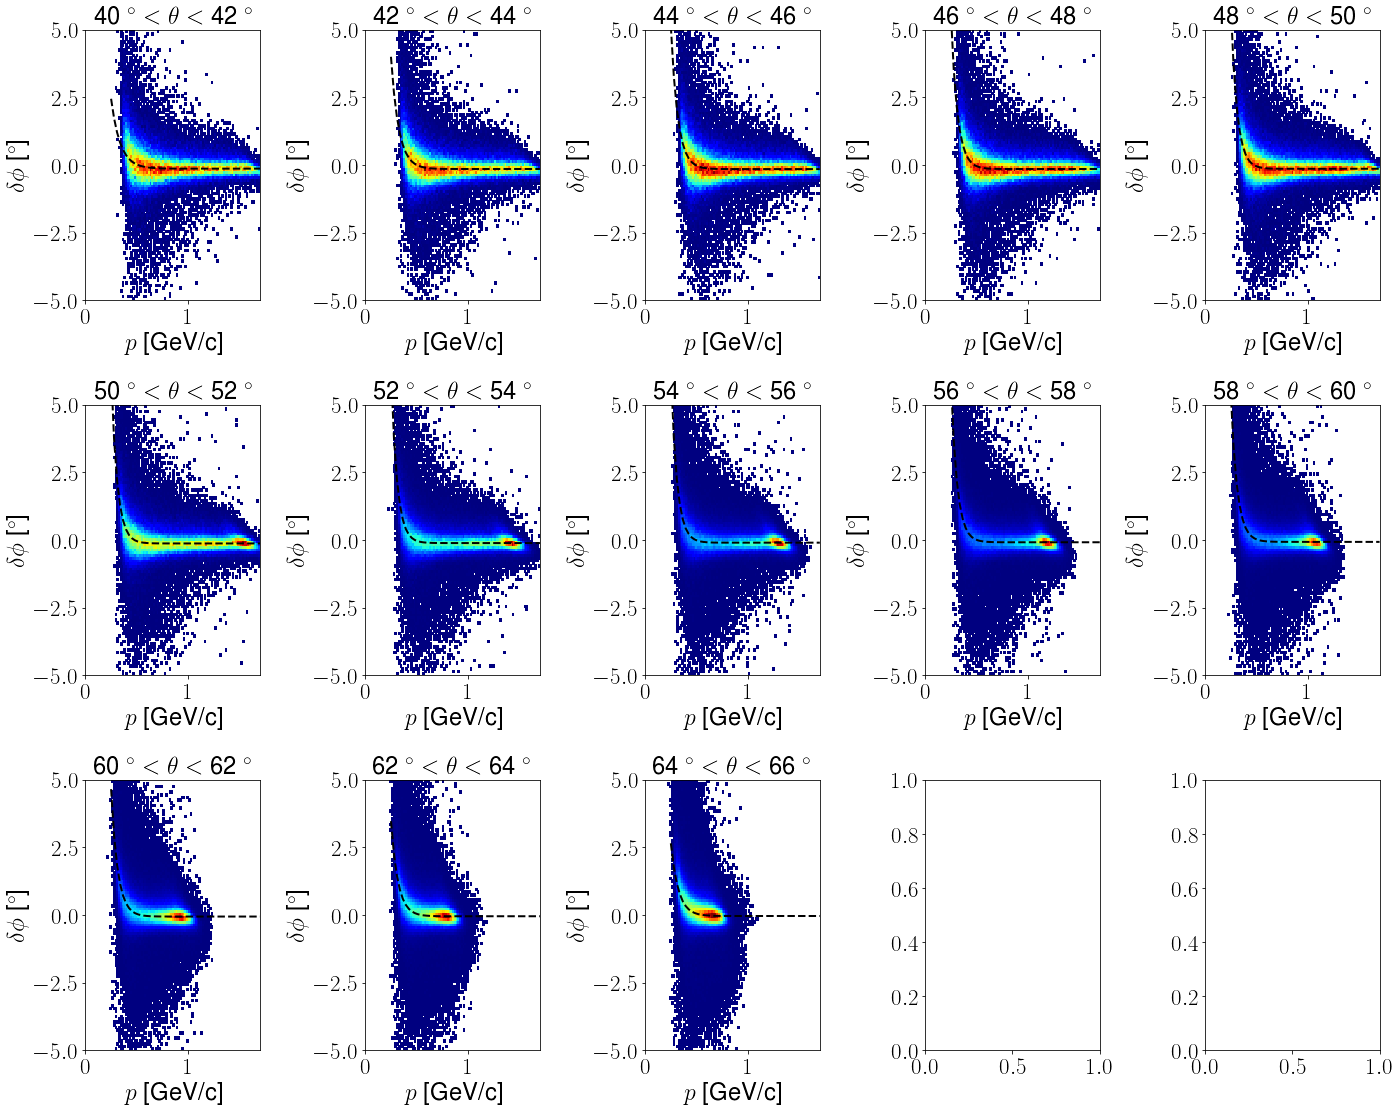

In [94]:
theta = np.linspace(0, 14, 15)*2+41
const_CD = 7.58761670 - 5.28224578*0.1 * theta +  1.31580117 * 0.01 * theta**2 -1.41738951*10**(-4) * theta**3 + 5.62884363*10**(-7) * theta**4
coeff_CD = 1.07644097*10**(5) - 8.67994639*10**(3) * theta + 2.57187193*10**(2) * theta**2 - 3.31379317 * theta**3 + 1.56896621*10**(-2) * theta**4
coeff2_CD =  1.92263184*10**(2) -1.00870704 * 10 * theta + 1.56575252*10**(-1) * theta**2 -7.71489734*10**(-4) * theta**3
params_phi = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPphi"] - outbendingCD.loc[thetaCond, "Pphi"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
plt.savefig("protonCD_outb_phi.pdf")

## 1-3-1

In [118]:
job3111_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_0.pkl")
job3111_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_1.pkl")
job3111_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_2.pkl")
job3111_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_3.pkl")
job3111_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_4.pkl")
job3111_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_5.pkl")
job3111_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_6.pkl")
job3111_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_7.pkl")
job3111_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_8.pkl")
job3111_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_9.pkl")
job3111_10 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_10.pkl")
job3111_11 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_11.pkl")
job3111_12 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_12.pkl")
job3111_13 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_13.pkl")
job3111_14 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_14.pkl")
job3111_15 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_15.pkl")
job3111_16 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_16.pkl")
job3111_17 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_17.pkl")
job3111_18 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_18.pkl")
job3111_19 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3111_CD_19.pkl")

outbending = pd.concat([globals()['job3111_'+str(i)] for i in range(20)])

job2942_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/2942_CD_0.pkl")
job2942_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/2942_CD_1.pkl")
job2942_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/2942_CD_2.pkl")
job2942_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/2942_CD_3.pkl")
job2942_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/2942_CD_4.pkl")
job2942_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/2942_CD_5.pkl")
job2942_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/2942_CD_6.pkl")
job2942_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/2942_CD_7.pkl")
job2942_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/2942_CD_8.pkl")
job2942_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/2942_CD_9.pkl")

job3057_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3057_CD_0.pkl")
job3057_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3057_CD_1.pkl")
job3057_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3057_CD_2.pkl")
job3057_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3057_CD_3.pkl")
job3057_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3057_CD_4.pkl")
job3057_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3057_CD_5.pkl")
job3057_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3057_CD_6.pkl")
job3057_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3057_CD_7.pkl")
job3057_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3057_CD_8.pkl")
job3057_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-3/3057_CD_9.pkl")

job2942 = pd.concat([globals()['job2942_'+str(i)] for i in range(10)])
job3057 = pd.concat([globals()['job3057_'+str(i)] for i in range(10)])
inbending = pd.concat([job2942, job3057])

inbendingCD = inbending.loc[inbending.Psector>7, :]
inbendingFD = inbending.loc[inbending.Psector<7, :]
outbendingCD = outbending.loc[outbending.Psector>7, :]
outbendingFD = outbending.loc[outbending.Psector<7, :]

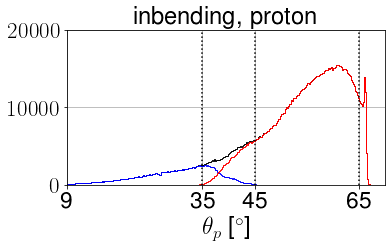

In [121]:
inbending.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'k')
inbendingFD.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'b')
inbendingCD.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'r')
plt.axvline(35, linestyle = ':', color = 'k')
plt.axvline(45, linestyle = ':', color = 'k')
plt.axvline(65, linestyle = ':', color = 'k')
plt.xticks([9, 35, 45, 65],[9, 35, 45, 65])
plt.title("inbending, proton")
plt.xlabel(r"$\theta_p$" + " ["+degree+"]")
plt.xlim([9, 70])
plt.ylim([0, 20000])
plt.tight_layout()
plt.savefig("proton_inbending_theta.pdf")

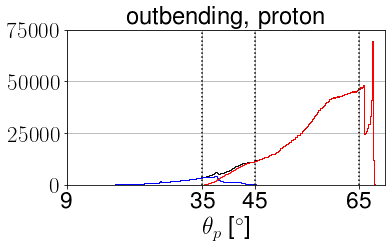

In [122]:
outbending.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'k')
outbendingFD.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'b')
outbendingCD.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'r')
plt.axvline(35, linestyle = ':', color = 'k')
plt.axvline(45, linestyle = ':', color = 'k')
plt.axvline(65, linestyle = ':', color = 'k')
plt.xticks([9, 35, 45, 65],[9, 35, 45, 65])

plt.title("outbending, proton")
plt.xlabel(r"$\theta_p$" + " ["+degree+"]")
plt.xlim([9, 70])
plt.ylim([0, 75000])
plt.tight_layout()
plt.savefig("proton_outbending_theta.pdf")

## 1-3-2, 1-4

In [4]:
job3111_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_0.pkl")
job3111_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_1.pkl")
job3111_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_2.pkl")
job3111_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_3.pkl")
job3111_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_4.pkl")
job3111_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_5.pkl")
job3111_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_6.pkl")
job3111_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_7.pkl")
job3111_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_8.pkl")
job3111_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_9.pkl")
job3111_10 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_10.pkl")
job3111_11 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_11.pkl")
job3111_12 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_12.pkl")
job3111_13 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_13.pkl")
job3111_14 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_14.pkl")
job3111_15 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_15.pkl")
job3111_16 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_16.pkl")
job3111_17 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_17.pkl")
job3111_18 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_18.pkl")
job3111_19 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_19.pkl")

outbending = pd.concat([globals()['job3111_'+str(i)] for i in range(20)])

job2942_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_0.pkl")
job2942_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_1.pkl")
job2942_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_2.pkl")
job2942_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_3.pkl")
job2942_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_4.pkl")
job2942_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_5.pkl")
job2942_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_6.pkl")
job2942_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_7.pkl")
job2942_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_8.pkl")
job2942_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_9.pkl")

job3057_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_0.pkl")
job3057_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_1.pkl")
job3057_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_2.pkl")
job3057_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_3.pkl")
job3057_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_4.pkl")
job3057_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_5.pkl")
job3057_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_6.pkl")
job3057_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_7.pkl")
job3057_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_8.pkl")
job3057_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_9.pkl")

job2942 = pd.concat([globals()['job2942_'+str(i)] for i in range(10)])
job3057 = pd.concat([globals()['job3057_'+str(i)] for i in range(10)])
inbending = pd.concat([job2942, job3057])

inbendingCD = inbending.loc[inbending.Psector>7, :]
inbendingFD = inbending.loc[inbending.Psector<7, :]
outbendingCD = outbending.loc[outbending.Psector>7, :]
outbendingFD = outbending.loc[outbending.Psector<7, :]

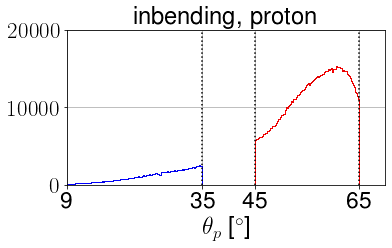

In [114]:
inbending.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'k')
inbendingFD.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'b')
inbendingCD.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'r')
plt.axvline(35, linestyle = ':', color = 'k')
plt.axvline(45, linestyle = ':', color = 'k')
plt.axvline(65, linestyle = ':', color = 'k')
plt.xticks([9, 35, 45, 65],[9, 35, 45, 65])
plt.title("inbending, proton")
plt.xlabel(r"$\theta_p$" + " ["+degree+"]")
plt.xlim([9, 70])
plt.ylim([0, 20000])
plt.tight_layout()
plt.savefig("proton_inbending_theta2.pdf")

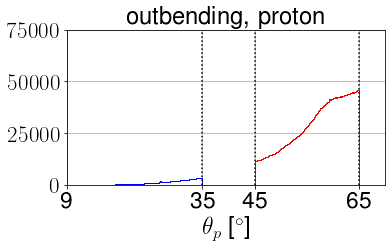

In [117]:
outbending.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'k')
outbendingFD.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'b')
outbendingCD.Ptheta.hist(bins = np.linspace(9, 70, 61*5+1), histtype = 'step', edgecolor = 'r')
plt.axvline(35, linestyle = ':', color = 'k')
plt.axvline(45, linestyle = ':', color = 'k')
plt.axvline(65, linestyle = ':', color = 'k')
plt.xticks([9, 35, 45, 65],[9, 35, 45, 65])

plt.title("outbending, proton")
plt.xlabel(r"$\theta_p$" + " ["+degree+"]")
plt.xlim([9, 70])
plt.ylim([0, 75000])
plt.tight_layout()
plt.savefig("proton_outbending_theta2.pdf")

In [126]:
len(outbendingCD)

3719380

In [136]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))
def lorentz(x, *p):
    I0, E0, gamma = p
    return I0*((gamma**2)/(((x-E0)**2)+gamma**2))

In [128]:
sim = inbending
# sim = outbending
VGS = [-sim.GenEpx, -sim.GenEpy, 10.604 - sim.GenEpz]
VGS2 = [sim.GenPpx + sim.GenGpx, sim.GenPp + sim.GenGpy, sim.GenPpz + sim.GenGpz]
ele = [sim.GenEpx, sim.GenEpy, sim.GenEpz]
pro = [sim.GenPpx, sim.GenPpy, sim.GenPpz]
gam = [sim.GenGpx, sim.GenGpy, sim.GenGpz]
GenEe = getEnergy(ele, 0.000511)
GenPe = getEnergy(pro, 0.93827)
GenQ2 = -((ebeam - GenEe)**2 - mag2(VGS))
GenNu = (ebeam - GenEe)
GenY = GenNu/ebeam
GenxB = GenQ2 / 2.0 / M / GenNu
GenT = 2 * M * (GenPe - M)
costheta = cosTheta(VGS, gam)
GenT2 =  (M * GenQ2 + 2 * M * GenNu * (GenNu - np.sqrt(GenNu * GenNu + GenQ2) * costheta))\
        / (M + GenNu - np.sqrt(GenNu * GenNu + GenQ2) * costheta)

v3l = cross(beam, ele)
v3h = cross(pro, VGS)
v3g = cross(VGS, gam)
GenPhi = angle(v3l, v3h)
sim.loc[:, "GenQ2"] = GenQ2
sim.loc[:, "GenxB"] = GenxB
sim.loc[:, "GenT1"] = GenT
sim.loc[:, "GenT2"] = GenT2
sim.loc[:, "GenPhi1"] = np.where(dot(v3l, pro) > 0, 360.0 - GenPhi, GenPhi)
GenPhi2 = angle(v3l, v3g)
sim.loc[:, "GenPhi2"] = np.where(dot(v3l, gam) < 0, 360.0 - GenPhi2, GenPhi2)

sim.loc[:, "GenW"] = np.sqrt(np.maximum(0, M*M + 2*M*GenNu-GenQ2))

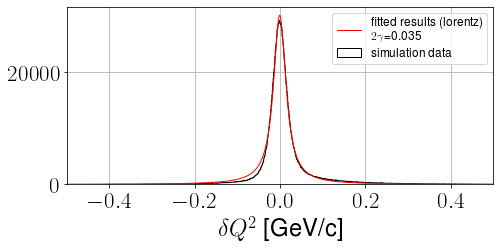

In [183]:
plt.rcParams["figure.figsize"] = (7.5,4)
(inbending.GenQ2-inbending.Q2).hist(bins = np.linspace(-0.5, 0.5, 1001), histtype = 'step', edgecolor ='k', label='simulation data')
data_entries, bins = np.histogram(inbending.GenQ2 - inbending.Q2, bins=np.linspace(-0.5, 0.5, 1001))
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
# popt, pcov = curve_fit(
#     gauss, xdata=binscenters, ydata=data_entries, p0=[np.max(data_entries), 0, 0.1])
popt, pcov = curve_fit(
    lorentz, xdata=binscenters, ydata=data_entries, p0=[np.max(data_entries), 0, 0.1])
plt.plot(binscenters, lorentz(binscenters,*popt), color='r', linewidth=1.0, label='fitted results (lorentz)'+'\n'+r'$2\gamma$='+'{:.3f}'.format(2*popt[2]))
plt.xlim([-0.5, 0.5])
plt.legend(loc='upper right')
plt.xlabel("$\delta Q^2$"+" [" + GeVc +"]")
plt.tight_layout()
plt.savefig("resolutionQ2.pdf")

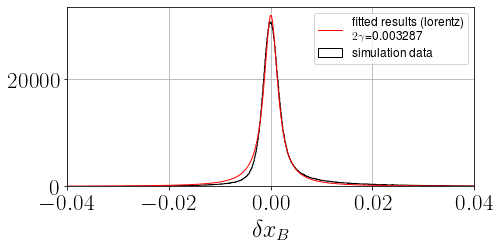

In [194]:
plt.rcParams["figure.figsize"] = (7.5,4)
(inbending.GenxB-inbending.xB).hist(bins = np.linspace(-0.05, 0.05, 1001), histtype = 'step', edgecolor ='k', label='simulation data')
data_entries, bins = np.histogram(inbending.GenxB - inbending.xB, bins=np.linspace(-0.05, 0.05, 1001))
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
# popt, pcov = curve_fit(
#     gauss, xdata=binscenters, ydata=data_entries, p0=[np.max(data_entries), 0, 0.1])
popt, pcov = curve_fit(
    lorentz, xdata=binscenters, ydata=data_entries, p0=[np.max(data_entries), 0, 0.1])
plt.plot(binscenters, lorentz(binscenters,*popt), color='r', linewidth=1.0, label='fitted results (lorentz)'+'\n'+r'$2\gamma$='+'{:.6f}'.format(2*np.abs(popt[2])))
plt.xlim([-0.04, 0.04])
plt.legend(loc='upper right')
plt.xlabel("$\delta x_B$")
plt.tight_layout()
plt.savefig("resolutionxB.pdf")

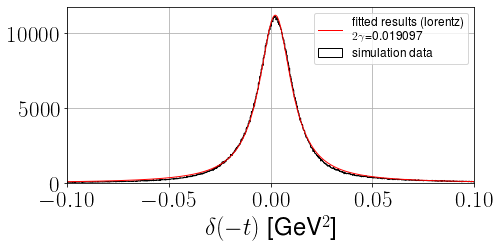

In [193]:
plt.rcParams["figure.figsize"] = (7.5,4)
(inbending.GenT2-inbending.t2).hist(bins = np.linspace(-0.1, 0.1, 1001), histtype = 'step', edgecolor ='k', label='simulation data')
data_entries, bins = np.histogram(inbending.GenT2 - inbending.t2, bins=np.linspace(-0.1, 0.1, 1001))
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
# popt, pcov = curve_fit(
#     gauss, xdata=binscenters, ydata=data_entries, p0=[np.max(data_entries), 0, 0.1])
popt, pcov = curve_fit(
    lorentz, xdata=binscenters, ydata=data_entries, p0=[np.max(data_entries), 0, 0.1])
plt.plot(binscenters, lorentz(binscenters,*popt), color='r', linewidth=1.0, label='fitted results (lorentz)'+'\n'+r'$2\gamma$='+'{:.6f}'.format(2*np.abs(popt[2])))
plt.xlim([-0.1, 0.1])
plt.legend(loc='upper right')
plt.xlabel("$\delta (-t)$"+" [" + GeV2 +"]")
plt.tight_layout()
plt.savefig("resolutionT.pdf")

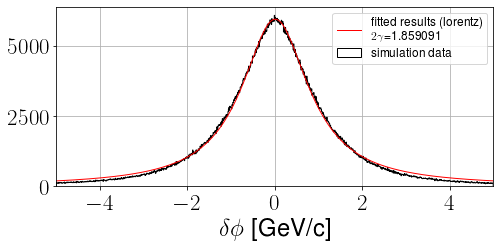

In [190]:
plt.rcParams["figure.figsize"] = (7.5,4)
(inbending.GenPhi2-inbending.phi2).hist(bins = np.linspace(-5, 5, 1001), histtype = 'step', edgecolor ='k', label='simulation data')
data_entries, bins = np.histogram(inbending.GenPhi2-inbending.phi2, bins=np.linspace(-5, 5, 1001))
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
# popt, pcov = curve_fit(
#     gauss, xdata=binscenters, ydata=data_entries, p0=[np.max(data_entries), 0, 0.1])
popt, pcov = curve_fit(
    lorentz, xdata=binscenters, ydata=data_entries, p0=[np.max(data_entries), 0, 0.1])
plt.plot(binscenters, lorentz(binscenters,*popt), color='r', linewidth=1.0, label='fitted results (lorentz)'+'\n'+r'$2\gamma$='+'{:.6f}'.format(2*popt[2]))
plt.xlim([-5, 5])
plt.legend(loc='upper right')
plt.xlabel("$\delta \phi$"+" [" + GeVc +"]")
plt.tight_layout()
plt.savefig("resolutionPhi.pdf")

<AxesSubplot:>

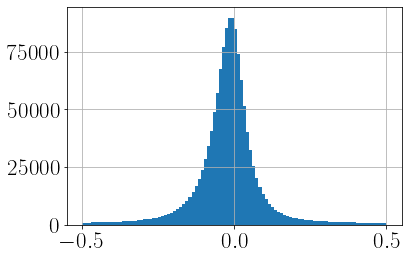

In [42]:
(inbendingCD.GenEtheta - inbendingCD.Etheta).hist(bins = np.linspace(-0.5, 0.5, 101))

## 1-5

In [4]:
job3111_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_0.pkl")
job3111_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_1.pkl")
job3111_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_2.pkl")
job3111_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_3.pkl")
job3111_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_4.pkl")
job3111_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_5.pkl")
job3111_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_6.pkl")
job3111_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_7.pkl")
job3111_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_8.pkl")
job3111_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_9.pkl")
job3111_10 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_10.pkl")
job3111_11 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_11.pkl")
job3111_12 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_12.pkl")
job3111_13 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_13.pkl")
job3111_14 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_14.pkl")
job3111_15 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_15.pkl")
job3111_16 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_16.pkl")
job3111_17 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_17.pkl")
job3111_18 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_18.pkl")
job3111_19 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3111_CD_19.pkl")

dvcsSimOutb = pd.concat([globals()['job3111_'+str(i)] for i in range(20)])

job2942_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_0.pkl")
job2942_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_1.pkl")
job2942_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_2.pkl")
job2942_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_3.pkl")
job2942_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_4.pkl")
job2942_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_5.pkl")
job2942_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_6.pkl")
job2942_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_7.pkl")
job2942_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_8.pkl")
job2942_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2942_CD_9.pkl")

job3057_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_0.pkl")
job3057_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_1.pkl")
job3057_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_2.pkl")
job3057_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_3.pkl")
job3057_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_4.pkl")
job3057_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_5.pkl")
job3057_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_6.pkl")
job3057_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_7.pkl")
job3057_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_8.pkl")
job3057_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/3057_CD_9.pkl")

job2942 = pd.concat([globals()['job2942_'+str(i)] for i in range(10)])
job3057 = pd.concat([globals()['job3057_'+str(i)] for i in range(10)])
dvcsSimInb = pd.concat([job2942, job3057])

dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.Psector>7, :]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.Psector<7, :]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.Psector>7, :]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.Psector<7, :]

In [111]:
pi02epg_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_0.pkl")
pi02epg_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_1.pkl")
pi02epg_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_2.pkl")
pi02epg_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_3.pkl")
pi02epg_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_4.pkl")
pi02epg_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_5.pkl")
pi02epg_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_6.pkl")
pi02epg_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_7.pkl")
pi02epg_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_8.pkl")
pi02epg_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_9.pkl")
pi02epg_10 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_10.pkl")
pi02epg_11 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_11.pkl")
pi02epg_12 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_12.pkl")
pi02epg_13 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_13.pkl")
pi02epg_14 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_14.pkl")
pi02epg_15 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_15.pkl")

In [112]:
pi02epgg_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_0.pkl")
pi02epgg_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_1.pkl")
pi02epgg_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_2.pkl")
pi02epgg_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_3.pkl")
pi02epgg_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_4.pkl")
pi02epgg_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_5.pkl")
pi02epgg_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_6.pkl")
pi02epgg_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_7.pkl")
pi02epgg_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_8.pkl")
pi02epgg_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_9.pkl")
pi02epgg_10 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_10.pkl")
pi02epgg_11 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_11.pkl")
pi02epgg_12 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_12.pkl")
pi02epgg_13 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_13.pkl")
pi02epgg_14 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_14.pkl")
pi02epgg_15 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_2g_CD_15.pkl")

In [113]:
bkgSimInb = pd.concat([globals()['pi02epg_'+str(i)] for i in range(16)])
pi0SimInb = pd.concat([globals()['pi02epgg_'+str(i)] for i in range(16)])
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.Psector>7, :]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.Psector<7, :]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.Psector>7, :]
pi0SimInbFD = pi0SimInb.loc[pi0SimInb.Psector<7, :]

In [8]:
import gc
for i in range(20):
    del globals()['job3111_'+str(i)]
    if i >15:
        continue
    del globals()['pi02epg_'+str(i)]
    del globals()['pi02epgg_'+str(i)]
    if i >9:
        continue
    del globals()['job2942_'+str(i)]
    del globals()['job3057_'+str(i)]
gc.collect()

0

In [9]:
epgExpInb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/dvcs_inb_CD.pkl")
pi0ExpInb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/pi0_inb_CD.pkl")
epgExpInbCD = epgExpInb.loc[epgExpInb.Psector>7, :]
epgExpInbFD = epgExpInb.loc[epgExpInb.Psector<7, :]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.Psector>7, :]
pi0ExpInbFD = pi0ExpInb.loc[pi0ExpInb.Psector<7, :]

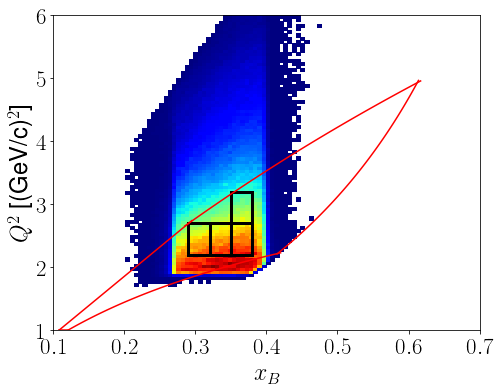

In [119]:
# plt.hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.1, 0.7, 101), np.linspace(1,11, 101)], cmin = 1, cmap = cmap)
# plt.show()
# plt.hist2d(dvcsSimInbFD.xB, dvcsSimInbFD.Q2, bins = [np.linspace(0.1, 0.7, 101), np.linspace(1,11, 101)], cmin = 1, cmap = cmap)
# plt.show()
plt.rcParams["figure.figsize"] = (7.5, 6)
plt.hist2d(pi0SimInb.xB, pi0SimInb.Q2, bins = [np.linspace(0.1, 0.7, 101), np.linspace(1,6, 101)], cmin = 1, cmap = cmap)
plt.plot([0.29, 0.29], [2.2, 2.7], color='k', linewidth = 3)
plt.plot([0.32, 0.32], [2.2, 2.7], color='k', linewidth = 3)
plt.plot([0.35, 0.35], [2.2, 3.2], color='k', linewidth = 3)
plt.plot([0.38, 0.38], [2.2, 3.2], color='k', linewidth = 3)
plt.plot([0.29, 0.38], [2.2, 2.2], color='k', linewidth = 3)
plt.plot([0.29, 0.38], [2.7, 2.7], color='k', linewidth = 3)
plt.plot([0.35, 0.38], [3.2, 3.2], color='k', linewidth = 3)
x1 = np.linspace(1/2/0.9382721/(5.75-0.8),0.295, 101)
plt.plot(x1, x1*2*0.9382721*(5.75-0.8), color = 'r')
x2 = np.linspace(1/2/0.9382721/(5.75-0.8),0.122, 101)
plt.plot(x2, 1+x2*0, color = 'r')
x3 = np.linspace(0.118,0.42, 101)
plt.plot(x3, 2*5.75*0.9382721*x3/(1+0.9382721*x3/5.75/(1-0.93358)), color = 'r')
x4 = np.linspace(0.285, 0.617, 101)
plt.plot(x4, 2*5.75*0.9382721*x4/(1+0.9382721*x4/5.75/(1-0.707107)), color = 'r')
x5 = np.linspace(0.415, 0.614, 101)
plt.plot(x5, (4 - 0.9382721*0.9382721)*x5/(1 - x5), color = 'r')
plt.xlabel("$x_B$")
plt.ylabel("$Q^2$" + " ["+GeVc2+"]")
plt.tight_layout()
plt.savefig("Q2xBbkg.pdf")

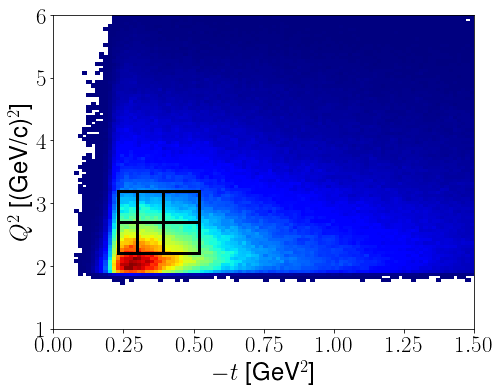

In [118]:
plt.rcParams["figure.figsize"] = (7.5, 6)
# sim = inbending
sim = pi0SimInb
VGS = [-sim.GenEpx, -sim.GenEpy, 10.604 - sim.GenEpz]
VGS2 = [sim.GenPpx + sim.GenGpx, sim.GenPp + sim.GenGpy, sim.GenPpz + sim.GenGpz]
ele = [sim.GenEpx, sim.GenEpy, sim.GenEpz]
pro = [sim.GenPpx, sim.GenPpy, sim.GenPpz]
gam = [sim.GenGpx, sim.GenGpy, sim.GenGpz]
GenEe = getEnergy(ele, 0.000511)
GenPe = getEnergy(pro, 0.93827)
GenQ2 = -((ebeam - GenEe)**2 - mag2(VGS))
GenNu = (ebeam - GenEe)
GenY = GenNu/ebeam
GenxB = GenQ2 / 2.0 / M / GenNu
GenT = 2 * M * (GenPe - M)
costheta = cosTheta(VGS, gam)
GenT2 =  (M * GenQ2 + 2 * M * GenNu * (GenNu - np.sqrt(GenNu * GenNu + GenQ2) * costheta))\
        / (M + GenNu - np.sqrt(GenNu * GenNu + GenQ2) * costheta)

plt.hist2d(pi0SimInb.t, pi0SimInb.Q2, bins = [np.linspace(0, 1.5, 101), np.linspace(1,6, 101)], cmin = 1, cmap = cmap)
# plt.plot([0.29, 0.29], [2.2, 2.7], color='k')
# plt.plot([0.32, 0.32], [2.2, 2.7], color='k')
# plt.plot([0.35, 0.35], [2.2, 3.2], color='k')
# plt.plot([0.38, 0.38], [2.2, 3.2], color='k')
plt.plot([0.23, 0.52], [2.2, 2.2], color='k', linewidth = 3)
plt.plot([0.23, 0.52], [2.7, 2.7], color='k', linewidth = 3)
plt.plot([0.23, 0.52], [3.2, 3.2], color='k', linewidth = 3)
plt.plot([0.23, 0.23], [2.2, 3.2], color='k', linewidth = 3)
plt.plot([0.3, 0.3], [2.2, 3.2], color='k', linewidth = 3)
plt.plot([0.39, 0.39], [2.2, 3.2], color='k', linewidth = 3)
plt.plot([0.52, 0.52], [2.2, 3.2], color='k', linewidth = 3)
# x1 = np.linspace(1/2/0.9382721/(5.75-0.8),0.295, 101)
# plt.plot(x1, x1*2*0.9382721*(5.75-0.8), color = 'g')
# x2 = np.linspace(1/2/0.9382721/(5.75-0.8),0.122, 101)
# plt.plot(x2, 1+x2*0, color = 'g')
# x3 = np.linspace(0.118,0.42, 101)
# plt.plot(x3, 2*5.75*0.9382721*x3/(1+0.9382721*x3/5.75/(1-0.93358)), color = 'g')
# x4 = np.linspace(0.285, 0.617, 101)
# plt.plot(x4, 2*5.75*0.9382721*x4/(1+0.9382721*x4/5.75/(1-0.707107)), color = 'g')
# x5 = np.linspace(0.415, 0.614, 101)
# plt.plot(x5, (4 - 0.9382721*0.9382721)*x5/(1 - x5), color = 'g')
plt.xlabel("$-t$"+" [" + GeV2+"]")
plt.ylabel("$Q^2$" + " ["+GeVc2+"]")
plt.tight_layout()
plt.savefig("tQ2bkg.pdf")

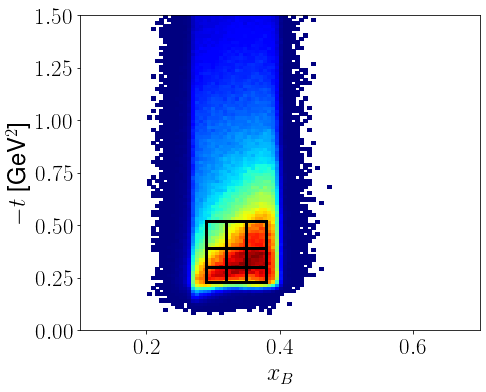

In [114]:
plt.rcParams["figure.figsize"] = (7.5, 6)
plt.hist2d(pi0SimInb.xB, pi0SimInb.t, bins = [np.linspace(0.1, 0.7, 101), np.linspace(0,1.5, 101)], cmin = 1, cmap = cmap)
# plt.plot([0.29, 0.29], [2.2, 2.7], color='k')
# plt.plot([0.32, 0.32], [2.2, 2.7], color='k')
# plt.plot([0.35, 0.35], [2.2, 3.2], color='k')
# plt.plot([0.38, 0.38], [2.2, 3.2], color='k')
plt.plot([0.29, 0.38], [0.23, 0.23], color='k', linewidth = 3)
plt.plot([0.29, 0.38], [0.3, 0.3], color='k', linewidth = 3)
plt.plot([0.29, 0.38], [0.39, 0.39], color='k', linewidth = 3)
plt.plot([0.29, 0.38], [0.52, 0.52], color='k', linewidth = 3)
plt.plot([0.29, 0.29], [0.23, 0.52], color='k', linewidth = 3)
plt.plot([0.32, 0.32], [0.23, 0.52], color='k', linewidth = 3)
plt.plot([0.35, 0.35], [0.23, 0.52], color='k', linewidth = 3)
plt.plot([0.38, 0.38], [0.23, 0.52], color='k', linewidth = 3)
# x1 = np.linspace(1/2/0.9382721/(5.75-0.8),0.295, 101)
# plt.plot(x1, x1*2*0.9382721*(5.75-0.8), color = 'g')
# x2 = np.linspace(1/2/0.9382721/(5.75-0.8),0.122, 101)
# plt.plot(x2, 1+x2*0, color = 'g')
# x3 = np.linspace(0.118,0.42, 101)
# plt.plot(x3, 2*5.75*0.9382721*x3/(1+0.9382721*x3/5.75/(1-0.93358)), color = 'g')
# x4 = np.linspace(0.285, 0.617, 101)
# plt.plot(x4, 2*5.75*0.9382721*x4/(1+0.9382721*x4/5.75/(1-0.707107)), color = 'g')
# x5 = np.linspace(0.415, 0.614, 101)
# plt.plot(x5, (4 - 0.9382721*0.9382721)*x5/(1 - x5), color = 'g')
plt.ylabel("$-t$"+" [" + GeV2+"]")
plt.xlabel("$x_B$" )
plt.tight_layout()
plt.savefig("txBbkg.pdf")

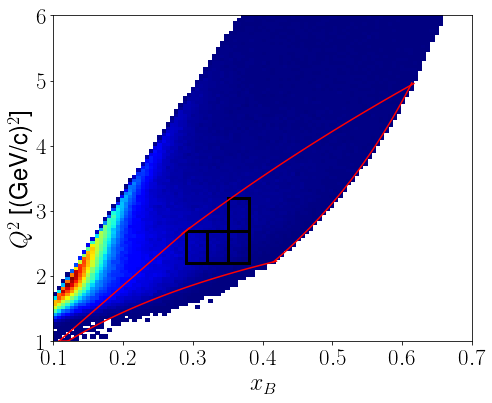

In [115]:
plt.rcParams["figure.figsize"] = (7.5, 6)
plt.hist2d(epgExpInb.xB, epgExpInb.Q2, bins = [np.linspace(0.1, 0.7, 101), np.linspace(1,6, 101)], cmin = 1, cmap = cmap)
plt.plot([0.29, 0.29], [2.2, 2.7], color='k', linewidth = 3)
plt.plot([0.32, 0.32], [2.2, 2.7], color='k', linewidth = 3)
plt.plot([0.35, 0.35], [2.2, 3.2], color='k', linewidth = 3)
plt.plot([0.38, 0.38], [2.2, 3.2], color='k', linewidth = 3)
plt.plot([0.29, 0.38], [2.2, 2.2], color='k', linewidth = 3)
plt.plot([0.29, 0.38], [2.7, 2.7], color='k', linewidth = 3)
plt.plot([0.35, 0.38], [3.2, 3.2], color='k', linewidth = 3)
x1 = np.linspace(1/2/0.9382721/(5.75-0.8),0.295, 101)
plt.plot(x1, x1*2*0.9382721*(5.75-0.8), color = 'r')
x2 = np.linspace(1/2/0.9382721/(5.75-0.8),0.122, 101)
plt.plot(x2, 1+x2*0, color = 'r')
x3 = np.linspace(0.118,0.42, 101)
plt.plot(x3, 2*5.75*0.9382721*x3/(1+0.9382721*x3/5.75/(1-0.93358)), color = 'r')
x4 = np.linspace(0.285, 0.617, 101)
plt.plot(x4, 2*5.75*0.9382721*x4/(1+0.9382721*x4/5.75/(1-0.707107)), color = 'r')
x5 = np.linspace(0.415, 0.614, 101)
plt.plot(x5, (4 - 0.9382721*0.9382721)*x5/(1 - x5), color = 'r')
plt.xlabel("$x_B$")
plt.ylabel("$Q^2$" + " ["+GeVc2+"]")
plt.savefig("Q2xBexp.pdf")
plt.show()

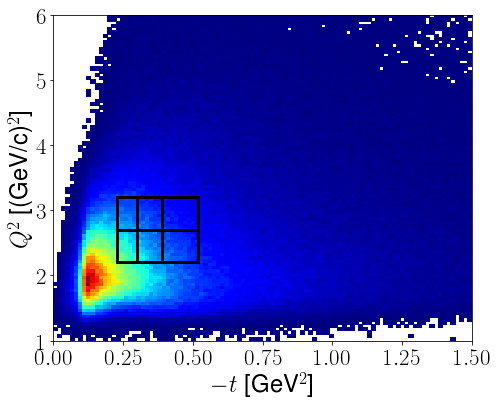

In [117]:
plt.rcParams["figure.figsize"] = (7.5, 6)
plt.hist2d(epgExpInb.t2, epgExpInb.Q2, bins = [np.linspace(0, 1.5, 101), np.linspace(1,6, 101)], cmin = 1, cmap = cmap)
# plt.plot([0.29, 0.29], [2.2, 2.7], color='k')
# plt.plot([0.32, 0.32], [2.2, 2.7], color='k')
# plt.plot([0.35, 0.35], [2.2, 3.2], color='k')
# plt.plot([0.38, 0.38], [2.2, 3.2], color='k')
plt.plot([0.23, 0.52], [2.2, 2.2], color='k', linewidth = 3)
plt.plot([0.23, 0.52], [2.7, 2.7], color='k', linewidth = 3)
plt.plot([0.23, 0.52], [3.2, 3.2], color='k', linewidth = 3)
plt.plot([0.23, 0.23], [2.2, 3.2], color='k', linewidth = 3)
plt.plot([0.3, 0.3], [2.2, 3.2], color='k', linewidth = 3)
plt.plot([0.39, 0.39], [2.2, 3.2], color='k', linewidth = 3)
plt.plot([0.52, 0.52], [2.2, 3.2], color='k', linewidth = 3)
# x1 = np.linspace(1/2/0.9382721/(5.75-0.8),0.295, 101)
# plt.plot(x1, x1*2*0.9382721*(5.75-0.8), color = 'g')
# x2 = np.linspace(1/2/0.9382721/(5.75-0.8),0.122, 101)
# plt.plot(x2, 1+x2*0, color = 'g')
# x3 = np.linspace(0.118,0.42, 101)
# plt.plot(x3, 2*5.75*0.9382721*x3/(1+0.9382721*x3/5.75/(1-0.93358)), color = 'g')
# x4 = np.linspace(0.285, 0.617, 101)
# plt.plot(x4, 2*5.75*0.9382721*x4/(1+0.9382721*x4/5.75/(1-0.707107)), color = 'g')
# x5 = np.linspace(0.415, 0.614, 101)
# plt.plot(x5, (4 - 0.9382721*0.9382721)*x5/(1 - x5), color = 'g')
plt.xlabel("$-t$"+" [" + GeV2+"]")
plt.ylabel("$Q^2$" + " ["+GeVc2+"]")
plt.savefig("tQ2exp.pdf")

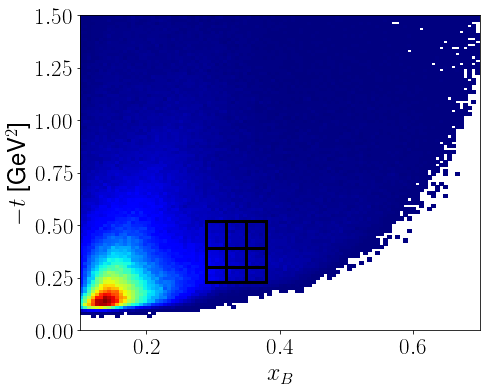

In [70]:
plt.rcParams["figure.figsize"] = (7.5, 6)
plt.hist2d(epgExpInb.xB, epgExpInb.t1, bins = [np.linspace(0.1, 0.7, 101), np.linspace(0,1.5, 101)], cmin = 1, cmap = cmap)
# plt.plot([0.29, 0.29], [2.2, 2.7], color='k')
# plt.plot([0.32, 0.32], [2.2, 2.7], color='k')
# plt.plot([0.35, 0.35], [2.2, 3.2], color='k')
# plt.plot([0.38, 0.38], [2.2, 3.2], color='k')
plt.plot([0.29, 0.38], [0.23, 0.23], color='k', linewidth = 3)
plt.plot([0.29, 0.38], [0.3, 0.3], color='k', linewidth = 3)
plt.plot([0.29, 0.38], [0.39, 0.39], color='k', linewidth = 3)
plt.plot([0.29, 0.38], [0.52, 0.52], color='k', linewidth = 3)
plt.plot([0.29, 0.29], [0.23, 0.52], color='k', linewidth = 3)
plt.plot([0.32, 0.32], [0.23, 0.52], color='k', linewidth = 3)
plt.plot([0.35, 0.35], [0.23, 0.52], color='k', linewidth = 3)
plt.plot([0.38, 0.38], [0.23, 0.52], color='k', linewidth = 3)
# x1 = np.linspace(1/2/0.9382721/(5.75-0.8),0.295, 101)
# plt.plot(x1, x1*2*0.9382721*(5.75-0.8), color = 'g')
# x2 = np.linspace(1/2/0.9382721/(5.75-0.8),0.122, 101)
# plt.plot(x2, 1+x2*0, color = 'g')
# x3 = np.linspace(0.118,0.42, 101)
# plt.plot(x3, 2*5.75*0.9382721*x3/(1+0.9382721*x3/5.75/(1-0.93358)), color = 'g')
# x4 = np.linspace(0.285, 0.617, 101)
# plt.plot(x4, 2*5.75*0.9382721*x4/(1+0.9382721*x4/5.75/(1-0.707107)), color = 'g')
# x5 = np.linspace(0.415, 0.614, 101)
# plt.plot(x5, (4 - 0.9382721*0.9382721)*x5/(1 - x5), color = 'g')
plt.ylabel("$-t$"+" [" + GeV2+"]")
plt.xlabel("$x_B$" )
plt.tight_layout()
plt.savefig("txBexp.pdf")

In [120]:
def dfinOneBin(df, lower_xB, upper_xB, lower_Q2, upper_Q2, lower_t, upper_t, lower_phi, upper_phi):
    cond_lower_Q2 = df["Q2"] >= lower_Q2
    cond_upper_Q2 = df["Q2"] < upper_Q2
    cond_lower_xB = df["xB"] >= lower_xB
    cond_upper_xB = df["xB"] < upper_xB
    if "t2" in df.columns:
        cond_lower_t = df["t2"] >= lower_t
        cond_upper_t = df["t2"] < upper_t
    else:
        cond_lower_t = df["t"] >= lower_t
        cond_upper_t = df["t"] < upper_t
    if "phi2" in df.columns:
        cond_lower_phi = df["phi2"] >= lower_phi
        cond_upper_phi = df["phi2"] < upper_phi
    else:
        cond_lower_phi = df["phi1"] >= lower_phi
        cond_upper_phi = df["phi1"] < upper_phi

    return df[cond_lower_xB & cond_upper_xB & cond_lower_Q2 & cond_upper_Q2 & cond_lower_phi & cond_upper_phi & cond_lower_t & cond_upper_t]


In [121]:
#bin1 0.29<xB<0.32, 2.2 < Q^2 < 2.7, 0.23 < -t < 0.3
epgExpInbFD_bin1 = dfinOneBin(epgExpInbFD, 0.29, 0.32, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0ExpInbFD_bin1 = dfinOneBin(pi0ExpInbFD, 0.29, 0.32, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
dvcsSimInbFD_bin1 = dfinOneBin(dvcsSimInbFD, 0.29, 0.32, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
bkgSimInbFD_bin1 = dfinOneBin(bkgSimInbFD, 0.29, 0.32, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0SimInbFD_bin1 = dfinOneBin(pi0SimInbFD, 0.29, 0.32, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)

#bin2 0.29<xB<0.32, 2.2 < Q^2 < 2.7, 0.3 < -t < 0.39
epgExpInbFD_bin2 = dfinOneBin(epgExpInbFD, 0.29, 0.32, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0ExpInbFD_bin2 = dfinOneBin(pi0ExpInbFD, 0.29, 0.32, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
dvcsSimInbFD_bin2 = dfinOneBin(dvcsSimInbFD, 0.29, 0.32, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
bkgSimInbFD_bin2 = dfinOneBin(bkgSimInbFD, 0.29, 0.32, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0SimInbFD_bin2 = dfinOneBin(pi0SimInbFD, 0.29, 0.32, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)

#bin3 0.29<xB<0.32, 2.2 < Q^2 < 2.7, 0.39 < -t < 0.52
epgExpInbFD_bin3 = dfinOneBin(epgExpInbFD, 0.29, 0.32, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0ExpInbFD_bin3 = dfinOneBin(pi0ExpInbFD, 0.29, 0.32, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
dvcsSimInbFD_bin3 = dfinOneBin(dvcsSimInbFD, 0.29, 0.32, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
bkgSimInbFD_bin3 = dfinOneBin(bkgSimInbFD, 0.29, 0.32, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0SimInbFD_bin3 = dfinOneBin(pi0SimInbFD, 0.29, 0.32, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)

#bin4 0.32<xB<0.35, 2.2 < Q^2 < 2.7, 0.23 < -t < 0.3
epgExpInbFD_bin4 = dfinOneBin(epgExpInbFD, 0.32, 0.35, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0ExpInbFD_bin4 = dfinOneBin(pi0ExpInbFD, 0.32, 0.35, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
dvcsSimInbFD_bin4 = dfinOneBin(dvcsSimInbFD, 0.32, 0.35, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
bkgSimInbFD_bin4 = dfinOneBin(bkgSimInbFD, 0.32, 0.35, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0SimInbFD_bin4 = dfinOneBin(pi0SimInbFD, 0.32, 0.35, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)

#bin5 0.32<xB<0.35, 2.2 < Q^2 < 2.7, 0.3 < -t < 0.39
epgExpInbFD_bin5 = dfinOneBin(epgExpInbFD, 0.32, 0.35, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0ExpInbFD_bin5 = dfinOneBin(pi0ExpInbFD, 0.32, 0.35, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
dvcsSimInbFD_bin5 = dfinOneBin(dvcsSimInbFD, 0.32, 0.35, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
bkgSimInbFD_bin5 = dfinOneBin(bkgSimInbFD, 0.32, 0.35, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0SimInbFD_bin5 = dfinOneBin(pi0SimInbFD, 0.32, 0.35, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)

#bin6 0.32<xB<0.35, 2.2 < Q^2 < 2.7, 0.39 < -t < 0.52
epgExpInbFD_bin6 = dfinOneBin(epgExpInbFD, 0.32, 0.35, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0ExpInbFD_bin6 = dfinOneBin(pi0ExpInbFD, 0.32, 0.35, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
dvcsSimInbFD_bin6 = dfinOneBin(dvcsSimInbFD, 0.32, 0.35, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
bkgSimInbFD_bin6 = dfinOneBin(bkgSimInbFD, 0.32, 0.35, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0SimInbFD_bin6 = dfinOneBin(pi0SimInbFD, 0.32, 0.35, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)

#bin7 0.35<xB<0.38, 2.2 < Q^2 < 2.7, 0.23 < -t < 0.3
epgExpInbFD_bin7 = dfinOneBin(epgExpInbFD, 0.35, 0.38, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0ExpInbFD_bin7 = dfinOneBin(pi0ExpInbFD, 0.35, 0.38, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
dvcsSimInbFD_bin7 = dfinOneBin(dvcsSimInbFD, 0.35, 0.38, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
bkgSimInbFD_bin7 = dfinOneBin(bkgSimInbFD, 0.35, 0.38, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0SimInbFD_bin7 = dfinOneBin(pi0SimInbFD, 0.35, 0.38, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)

#bin8 0.35<xB<0.38, 2.2 < Q^2 < 2.7, 0.3 < -t < 0.39
epgExpInbFD_bin8 = dfinOneBin(epgExpInbFD, 0.35, 0.38, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0ExpInbFD_bin8 = dfinOneBin(pi0ExpInbFD, 0.35, 0.38, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
dvcsSimInbFD_bin8 = dfinOneBin(dvcsSimInbFD, 0.35, 0.38, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
bkgSimInbFD_bin8 = dfinOneBin(bkgSimInbFD, 0.35, 0.38, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0SimInbFD_bin8 = dfinOneBin(pi0SimInbFD, 0.35, 0.38, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)

#bin9 0.35<xB<0.38, 2.2 < Q^2 < 2.7, 0.39 < -t < 0.52
epgExpInbFD_bin9 = dfinOneBin(epgExpInbFD, 0.35, 0.38, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0ExpInbFD_bin9 = dfinOneBin(pi0ExpInbFD, 0.35, 0.38, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
dvcsSimInbFD_bin9 = dfinOneBin(dvcsSimInbFD, 0.35, 0.38, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
bkgSimInbFD_bin9 = dfinOneBin(bkgSimInbFD, 0.35, 0.38, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0SimInbFD_bin9 = dfinOneBin(pi0SimInbFD, 0.35, 0.38, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)

#bin10 0.35<xB<0.38, 2.7 < Q^2 < 3.2, 0.23 < -t < 0.3
epgExpInbFD_bin10 = dfinOneBin(epgExpInbFD, 0.35, 0.38, 2.7, 3.2, 0.23, 0.3, -0.1, 360.1)
pi0ExpInbFD_bin10 = dfinOneBin(pi0ExpInbFD, 0.35, 0.38, 2.7, 3.2, 0.23, 0.3, -0.1, 360.1)
dvcsSimInbFD_bin10 = dfinOneBin(dvcsSimInbFD, 0.35, 0.38, 2.7, 3.2, 0.23, 0.3, -0.1, 360.1)
bkgSimInbFD_bin10 = dfinOneBin(bkgSimInbFD, 0.35, 0.38, 2.7, 3.2, 0.23, 0.3, -0.1, 360.1)
pi0SimInbFD_bin10 = dfinOneBin(pi0SimInbFD, 0.35, 0.38, 2.7, 3.2, 0.23, 0.3, -0.1, 360.1)

#bin11 0.35<xB<0.38, 2.7 < Q^2 < 3.2, 0.3 < -t < 0.39
epgExpInbFD_bin11 = dfinOneBin(epgExpInbFD, 0.35, 0.38, 2.7, 3.2, 0.3, 0.39, -0.1, 360.1)
pi0ExpInbFD_bin11 = dfinOneBin(pi0ExpInbFD, 0.35, 0.38, 2.7, 3.2, 0.3, 0.39, -0.1, 360.1)
dvcsSimInbFD_bin11 = dfinOneBin(dvcsSimInbFD, 0.35, 0.38, 2.7, 3.2, 0.3, 0.39, -0.1, 360.1)
bkgSimInbFD_bin11 = dfinOneBin(bkgSimInbFD, 0.35, 0.38, 2.7, 3.2, 0.3, 0.39, -0.1, 360.1)
pi0SimInbFD_bin11 = dfinOneBin(pi0SimInbFD, 0.35, 0.38, 2.7, 3.2, 0.3, 0.39, -0.1, 360.1)

#bin12 0.35<xB<0.38, 2.7 < Q^2 < 3.2, 0.39 < -t < 0.52
epgExpInbFD_bin12 = dfinOneBin(epgExpInbFD, 0.35, 0.38, 2.7, 3.2, 0.39, 0.52, -0.1, 360.1)
pi0ExpInbFD_bin12 = dfinOneBin(pi0ExpInbFD, 0.35, 0.38, 2.7, 3.2, 0.39, 0.52, -0.1, 360.1)
dvcsSimInbFD_bin12 = dfinOneBin(dvcsSimInbFD, 0.35, 0.38, 2.7, 3.2, 0.39, 0.52, -0.1, 360.1)
bkgSimInbFD_bin12 = dfinOneBin(bkgSimInbFD, 0.35, 0.38, 2.7, 3.2, 0.39, 0.52, -0.1, 360.1)
pi0SimInbFD_bin12 = dfinOneBin(pi0SimInbFD, 0.35, 0.38, 2.7, 3.2, 0.39, 0.52, -0.1, 360.1)

In [151]:
# cont_inb_FD = len(phi_bkgrec)/len(phi_pi0rec)*len(phi_pi0data)/len(phi_data)

bkgSimInbFD = pd.concat([globals()['bkgSimInbFD_bin'+str(i+1)] for i in range(12)])
pi0SimInbFD = pd.concat([globals()['pi0SimInbFD_bin'+str(i+1)] for i in range(12)])
pi0ExpInbFD = pd.concat([globals()['pi0ExpInbFD_bin'+str(i+1)] for i in range(12)])
epgExpInbFD = pd.concat([globals()['epgExpInbFD_bin'+str(i+1)] for i in range(12)])
dvcsSimInbFD = pd.concat([globals()['dvcsSimInbFD_bin'+str(i+1)] for i in range(12)])

# cont_inb_FD 
len_bkgSimInbFD = len(bkgSimInbFD)
len_pi0SimInbFD = len(pi0SimInbFD)
len_pi0ExpInbFD = len(pi0ExpInbFD)
len_epgExpInbFD = len(epgExpInbFD)
len_dvcsSimInbFD = len(dvcsSimInbFD)
print(len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_epgExpInbFD)
cont_inb_FD = len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_epgExpInbFD

0.39098176305922056


In [156]:
def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / numpy.sum(hist)
    return mean

In [276]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 2.2, 0.29, 0.23, 0]
binends = [5, 3, 3.2, 0.38, 0.52, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 21)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins)
        simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
#         axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
        axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins))
        axs[yind, xind].step(bincenters, (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
axs[0,2].set_xticks([2.2, 2.7, 3.2])
axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.clf()

nu 4.062072659357064
xB 0.3391747341105033
W 2.4315139965346133
t2 0.3751764950256849
Q2 2.578479298884507
phi2 175.50835879327255


<Figure size 1080x720 with 0 Axes>

In [277]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\gamma}$", "MM"+r"${}^{2}_{ep\gamma}$", "MM"+r"${}^{2}_{e\gamma}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [35, 1.5, 10, 1.5, 0.04, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 21)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins)
        simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        expDist, bin = np.histogram(epgExpInbFD[varstoplot[ind]], bins)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
#         axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
        axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        axs[yind, xind].step(bincenters, (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
axs[0,1].set_xticks([0, 0.5, 1, 1.5])
axs[0, -1].set_xticks([-0.5, 0, 0.5, 1, 1.5])
axs[1, 0].set_xticks([-0.04, 0, 0.04])
axs[1, 1].set_xticks([0.1, 1, 1.7])
axs[1, 2].set_xticks([-0.4, 0, 0.4])
plt.savefig("exclFD.pdf")

# plt.show()
# plt.savefig("analysisnote/inbending2.pdf")
plt.clf()

<Figure size 1080x720 with 0 Axes>

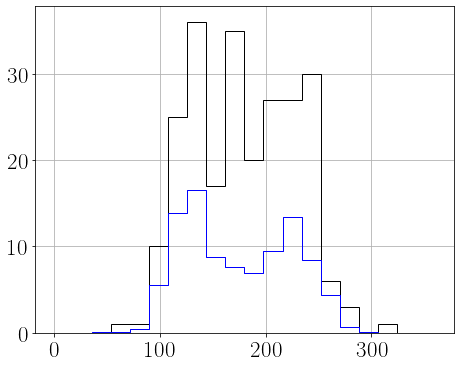

In [145]:
phi_edges = np.linspace(0, 360, 21)
epgExpInbFD_bin1.phi2.hist(bins = phi_edges, histtype = 'step', edgecolor = 'k')
hist, bins = np.histogram(bkgSimInbFD_bin1.phi2, bins = phi_edges)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
plt.step(binscenters, len_pi0ExpInbFD/len_pi0SimInbFD*hist, where='mid',color='b', linewidth=1)

In [147]:
len_dvcsSimInbFD

5488

In [143]:
np.sum(len_pi0ExpInbFD/len_pi0SimInbFD*hist)

106.3173401110016

In [193]:
#bin1 0.29<xB<0.32, 2.2 < Q^2 < 2.7, 0.23 < -t < 0.3
epgExpInbCD_bin1 = dfinOneBin(epgExpInbCD, 0.29, 0.32, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0ExpInbCD_bin1 = dfinOneBin(pi0ExpInbCD, 0.29, 0.32, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
dvcsSimInbCD_bin1 = dfinOneBin(dvcsSimInbCD, 0.29, 0.32, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
bkgSimInbCD_bin1 = dfinOneBin(bkgSimInbCD, 0.29, 0.32, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0SimInbCD_bin1 = dfinOneBin(pi0SimInbCD, 0.29, 0.32, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)

#bin2 0.29<xB<0.32, 2.2 < Q^2 < 2.7, 0.3 < -t < 0.39
epgExpInbCD_bin2 = dfinOneBin(epgExpInbCD, 0.29, 0.32, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0ExpInbCD_bin2 = dfinOneBin(pi0ExpInbCD, 0.29, 0.32, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
dvcsSimInbCD_bin2 = dfinOneBin(dvcsSimInbCD, 0.29, 0.32, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
bkgSimInbCD_bin2 = dfinOneBin(bkgSimInbCD, 0.29, 0.32, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0SimInbCD_bin2 = dfinOneBin(pi0SimInbCD, 0.29, 0.32, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)

#bin3 0.29<xB<0.32, 2.2 < Q^2 < 2.7, 0.39 < -t < 0.52
epgExpInbCD_bin3 = dfinOneBin(epgExpInbCD, 0.29, 0.32, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0ExpInbCD_bin3 = dfinOneBin(pi0ExpInbCD, 0.29, 0.32, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
dvcsSimInbCD_bin3 = dfinOneBin(dvcsSimInbCD, 0.29, 0.32, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
bkgSimInbCD_bin3 = dfinOneBin(bkgSimInbCD, 0.29, 0.32, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0SimInbCD_bin3 = dfinOneBin(pi0SimInbCD, 0.29, 0.32, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)

#bin4 0.32<xB<0.35, 2.2 < Q^2 < 2.7, 0.23 < -t < 0.3
epgExpInbCD_bin4 = dfinOneBin(epgExpInbCD, 0.32, 0.35, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0ExpInbCD_bin4 = dfinOneBin(pi0ExpInbCD, 0.32, 0.35, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
dvcsSimInbCD_bin4 = dfinOneBin(dvcsSimInbCD, 0.32, 0.35, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
bkgSimInbCD_bin4 = dfinOneBin(bkgSimInbCD, 0.32, 0.35, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0SimInbCD_bin4 = dfinOneBin(pi0SimInbCD, 0.32, 0.35, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)

#bin5 0.32<xB<0.35, 2.2 < Q^2 < 2.7, 0.3 < -t < 0.39
epgExpInbCD_bin5 = dfinOneBin(epgExpInbCD, 0.32, 0.35, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0ExpInbCD_bin5 = dfinOneBin(pi0ExpInbCD, 0.32, 0.35, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
dvcsSimInbCD_bin5 = dfinOneBin(dvcsSimInbCD, 0.32, 0.35, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
bkgSimInbCD_bin5 = dfinOneBin(bkgSimInbCD, 0.32, 0.35, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0SimInbCD_bin5 = dfinOneBin(pi0SimInbCD, 0.32, 0.35, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)

#bin6 0.32<xB<0.35, 2.2 < Q^2 < 2.7, 0.39 < -t < 0.52
epgExpInbCD_bin6 = dfinOneBin(epgExpInbCD, 0.32, 0.35, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0ExpInbCD_bin6 = dfinOneBin(pi0ExpInbCD, 0.32, 0.35, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
dvcsSimInbCD_bin6 = dfinOneBin(dvcsSimInbCD, 0.32, 0.35, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
bkgSimInbCD_bin6 = dfinOneBin(bkgSimInbCD, 0.32, 0.35, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0SimInbCD_bin6 = dfinOneBin(pi0SimInbCD, 0.32, 0.35, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)

#bin7 0.35<xB<0.38, 2.2 < Q^2 < 2.7, 0.23 < -t < 0.3
epgExpInbCD_bin7 = dfinOneBin(epgExpInbCD, 0.35, 0.38, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0ExpInbCD_bin7 = dfinOneBin(pi0ExpInbCD, 0.35, 0.38, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
dvcsSimInbCD_bin7 = dfinOneBin(dvcsSimInbCD, 0.35, 0.38, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
bkgSimInbCD_bin7 = dfinOneBin(bkgSimInbCD, 0.35, 0.38, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
pi0SimInbCD_bin7 = dfinOneBin(pi0SimInbCD, 0.35, 0.38, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)

#bin8 0.35<xB<0.38, 2.2 < Q^2 < 2.7, 0.3 < -t < 0.39
epgExpInbCD_bin8 = dfinOneBin(epgExpInbCD, 0.35, 0.38, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0ExpInbCD_bin8 = dfinOneBin(pi0ExpInbCD, 0.35, 0.38, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
dvcsSimInbCD_bin8 = dfinOneBin(dvcsSimInbCD, 0.35, 0.38, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
bkgSimInbCD_bin8 = dfinOneBin(bkgSimInbCD, 0.35, 0.38, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)
pi0SimInbCD_bin8 = dfinOneBin(pi0SimInbCD, 0.35, 0.38, 2.2, 2.7, 0.3, 0.39, -0.1, 360.1)

#bin9 0.35<xB<0.38, 2.2 < Q^2 < 2.7, 0.39 < -t < 0.52
epgExpInbCD_bin9 = dfinOneBin(epgExpInbCD, 0.35, 0.38, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0ExpInbCD_bin9 = dfinOneBin(pi0ExpInbCD, 0.35, 0.38, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
dvcsSimInbCD_bin9 = dfinOneBin(dvcsSimInbCD, 0.35, 0.38, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
bkgSimInbCD_bin9 = dfinOneBin(bkgSimInbCD, 0.35, 0.38, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)
pi0SimInbCD_bin9 = dfinOneBin(pi0SimInbCD, 0.35, 0.38, 2.2, 2.7, 0.39, 0.52, -0.1, 360.1)

#bin10 0.35<xB<0.38, 2.7 < Q^2 < 3.2, 0.23 < -t < 0.3
epgExpInbCD_bin10 = dfinOneBin(epgExpInbCD, 0.35, 0.38, 2.7, 3.2, 0.23, 0.3, -0.1, 360.1)
pi0ExpInbCD_bin10 = dfinOneBin(pi0ExpInbCD, 0.35, 0.38, 2.7, 3.2, 0.23, 0.3, -0.1, 360.1)
dvcsSimInbCD_bin10 = dfinOneBin(dvcsSimInbCD, 0.35, 0.38, 2.7, 3.2, 0.23, 0.3, -0.1, 360.1)
bkgSimInbCD_bin10 = dfinOneBin(bkgSimInbCD, 0.35, 0.38, 2.7, 3.2, 0.23, 0.3, -0.1, 360.1)
pi0SimInbCD_bin10 = dfinOneBin(pi0SimInbCD, 0.35, 0.38, 2.7, 3.2, 0.23, 0.3, -0.1, 360.1)

#bin11 0.35<xB<0.38, 2.7 < Q^2 < 3.2, 0.3 < -t < 0.39
epgExpInbCD_bin11 = dfinOneBin(epgExpInbCD, 0.35, 0.38, 2.7, 3.2, 0.3, 0.39, -0.1, 360.1)
pi0ExpInbCD_bin11 = dfinOneBin(pi0ExpInbCD, 0.35, 0.38, 2.7, 3.2, 0.3, 0.39, -0.1, 360.1)
dvcsSimInbCD_bin11 = dfinOneBin(dvcsSimInbCD, 0.35, 0.38, 2.7, 3.2, 0.3, 0.39, -0.1, 360.1)
bkgSimInbCD_bin11 = dfinOneBin(bkgSimInbCD, 0.35, 0.38, 2.7, 3.2, 0.3, 0.39, -0.1, 360.1)
pi0SimInbCD_bin11 = dfinOneBin(pi0SimInbCD, 0.35, 0.38, 2.7, 3.2, 0.3, 0.39, -0.1, 360.1)

#bin12 0.35<xB<0.38, 2.7 < Q^2 < 3.2, 0.39 < -t < 0.52
epgExpInbCD_bin12 = dfinOneBin(epgExpInbCD, 0.35, 0.38, 2.7, 3.2, 0.39, 0.52, -0.1, 360.1)
pi0ExpInbCD_bin12 = dfinOneBin(pi0ExpInbCD, 0.35, 0.38, 2.7, 3.2, 0.39, 0.52, -0.1, 360.1)
dvcsSimInbCD_bin12 = dfinOneBin(dvcsSimInbCD, 0.35, 0.38, 2.7, 3.2, 0.39, 0.52, -0.1, 360.1)
bkgSimInbCD_bin12 = dfinOneBin(bkgSimInbCD, 0.35, 0.38, 2.7, 3.2, 0.39, 0.52, -0.1, 360.1)
pi0SimInbCD_bin12 = dfinOneBin(pi0SimInbCD, 0.35, 0.38, 2.7, 3.2, 0.39, 0.52, -0.1, 360.1)

In [198]:
# cont_inb_CD = len(phi_bkgrec)/len(phi_pi0rec)*len(phi_pi0data)/len(phi_data)

bkgSimInbCD = pd.concat([globals()['bkgSimInbCD_bin'+str(i+1)] for i in range(12)])
pi0SimInbCD = pd.concat([globals()['pi0SimInbCD_bin'+str(i+1)] for i in range(12)])
pi0ExpInbCD = pd.concat([globals()['pi0ExpInbCD_bin'+str(i+1)] for i in range(12)])
epgExpInbCD = pd.concat([globals()['epgExpInbCD_bin'+str(i+1)] for i in range(12)])
dvcsSimInbCD = pd.concat([globals()['dvcsSimInbCD_bin'+str(i+1)] for i in range(12)])

# cont_inb_CD 
len_bkgSimInbCD = len(bkgSimInbCD)
len_pi0SimInbCD = len(pi0SimInbCD)
len_pi0ExpInbCD = len(pi0ExpInbCD)
len_epgExpInbCD = len(epgExpInbCD)
len_dvcsSimInbCD = len(dvcsSimInbCD)
print(len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_epgExpInbCD)
cont_inb_CD = len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_epgExpInbCD

0.2932600208147669


In [278]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 2.2, 0.29, 0.23, 0]
binends = [5, 3, 3.2, 0.38, 0.52, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 21)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins)
        simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
#         axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
        axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, bins))
        axs[yind, xind].step(bincenters, (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
axs[0,2].set_xticks([2.2, 2.7, 3.2])
axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.clf()

nu 4.08628106849132
xB 0.33080427035767773
W 2.4506803237996624
t2 0.3615489782765409
Q2 2.527915871884307
phi2 164.30215624831308


<Figure size 1080x720 with 0 Axes>

In [229]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\gamma}$", "MM"+r"${}^{2}_{ep\gamma}$", "MM"+r"${}^{2}_{e\gamma}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [30, 1.5, 10, 1.5, 0.04, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 21)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins)
        simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        expDist, bin = np.histogram(epgExpInbCD[varstoplot[ind]], bins)
        print(varstoplot[ind], nphistmean(expDist - cont_inb_CD*simDist_dvpi0, bins))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
#         axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
        axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        axs[yind, xind].step(bincenters, (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
axs[0,1].set_xticks([0, 0.5, 1, 1.5])
axs[0, -1].set_xticks([-0.5, 0, 0.5, 1, 1.5])
axs[1, 0].set_xticks([-0.04, 0, 0.04])
axs[1, 1].set_xticks([0.1, 1, 1.7])
axs[1, 2].set_xticks([-0.4, 0, 0.4])
plt.savefig("exclCD.pdf")

# plt.show()
# plt.savefig("analysisnote/inbending2.pdf")
plt.clf()

coneAngle 23.42294441507815
reconGam 0.713908066571873
coplanarity 4.26039850117056
ME_epg 0.4689438911632991
MM2_epg 0.00043542434595778196
MM2_eg 1.2983280903774852
MM2_ep 0.04081589673367336
MPt 0.0803708602983571


<Figure size 1080x720 with 0 Axes>

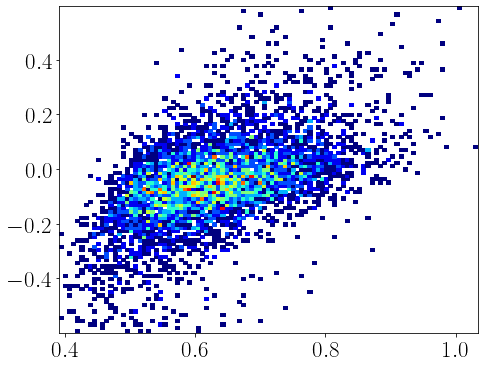

In [205]:
plt.hist2d(epgExpInbCD.Pp, epgExpInbCD.MM2_ep, bins = 101, cmap = cmap, cmin = 1)
plt.show()

In [331]:
varstoshow = ["xB","Q2", "t2"]
for ind in range(12):
    bkg = globals()['bkgSimInbFD_bin'+str(ind+1)]
    exp = globals()['epgExpInbFD_bin'+str(ind+1)]
#     print(ind+1, end='\t')
    for var in varstoshow:
        simDist_dvpi0, bins = np.histogram(bkg[var], 1000)
        expDist, bins = np.histogram(exp[var], 1000)
        if var == "xB":
            print('./dvcsgen --x {0:1.5f} {0:1.5f}'.format(nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins)), end =' ')
        elif var == "Q2":
            print("--q2 {0:1.5f} {0:1.5f}".format(nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins)), end =' ')
        elif var == "t2":
            print("--t {0:1.5f} {0:1.5f} --bh 3".format(nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins)))

./dvcsgen --x 0.30525 0.30525 --q2 2.45651 2.45651 --t 0.26739 0.26739 --bh 3
./dvcsgen --x 0.30526 0.30526 --q2 2.42958 2.42958 --t 0.34247 0.34247 --bh 3
./dvcsgen --x 0.30496 0.30496 --q2 2.44176 2.44176 --t 0.44848 0.44848 --bh 3
./dvcsgen --x 0.33534 0.33534 --q2 2.51039 2.51039 --t 0.26989 0.26989 --bh 3
./dvcsgen --x 0.33607 0.33607 --q2 2.46067 2.46067 --t 0.34416 0.34416 --bh 3
./dvcsgen --x 0.33371 0.33371 --q2 2.45511 2.45511 --t 0.46195 0.46195 --bh 3
./dvcsgen --x 0.36605 0.36605 --q2 2.46017 2.46017 --t 0.26490 0.26490 --bh 3
./dvcsgen --x 0.36442 0.36442 --q2 2.45630 2.45630 --t 0.33980 0.33980 --bh 3
./dvcsgen --x 0.36423 0.36423 --q2 2.47632 2.47632 --t 0.45300 0.45300 --bh 3
./dvcsgen --x 0.36670 0.36670 --q2 2.97220 2.97220 --t 0.26752 0.26752 --bh 3
./dvcsgen --x 0.36375 0.36375 --q2 2.95378 2.95378 --t 0.33975 0.33975 --bh 3
./dvcsgen --x 0.36488 0.36488 --q2 2.93730 2.93730 --t 0.44939 0.44939 --bh 3


In [333]:
varstoshow = ["xB","Q2", "t2"]
for ind in range(12):
    bkg = globals()['bkgSimInbCD_bin'+str(ind+1)]
    exp = globals()['epgExpInbCD_bin'+str(ind+1)]
#     print(ind+1, end='\t')
    for var in varstoshow:
        simDist_dvpi0, bins = np.histogram(bkg[var], 1000)
        expDist, bins = np.histogram(exp[var], 1000)
        if var == "xB":
            print('./dvcsgen --x {0:1.5f} {0:1.5f}'.format(nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins)), end =' ')
        elif var == "Q2":
            print("--q2 {0:1.5f} {0:1.5f}".format(nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins)), end =' ')
        elif var == "t2":
            print("--t {0:1.5f} {0:1.5f} --bh 1".format(nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins)))

./dvcsgen --x 0.30388 0.30388 --q2 2.45620 2.45620 --t 0.26578 0.26578 --bh 1
./dvcsgen --x 0.30429 0.30429 --q2 2.46451 2.46451 --t 0.34071 0.34071 --bh 1
./dvcsgen --x 0.30492 0.30492 --q2 2.46078 2.46078 --t 0.44792 0.44792 --bh 1
./dvcsgen --x 0.33395 0.33395 --q2 2.42689 2.42689 --t 0.26905 0.26905 --bh 1
./dvcsgen --x 0.33405 0.33405 --q2 2.44235 2.44235 --t 0.34087 0.34087 --bh 1
./dvcsgen --x 0.33516 0.33516 --q2 2.48177 2.48177 --t 0.44963 0.44963 --bh 1
./dvcsgen --x 0.36130 0.36130 --q2 2.47262 2.47262 --t 0.26970 0.26970 --bh 1
./dvcsgen --x 0.36278 0.36278 --q2 2.47874 2.47874 --t 0.34721 0.34721 --bh 1
./dvcsgen --x 0.36393 0.36393 --q2 2.46884 2.46884 --t 0.44713 0.44713 --bh 1
./dvcsgen --x 0.36142 0.36142 --q2 2.94456 2.94456 --t 0.27346 0.27346 --bh 1
./dvcsgen --x 0.36309 0.36309 --q2 2.92898 2.92898 --t 0.34351 0.34351 --bh 1
./dvcsgen --x 0.36406 0.36406 --q2 2.91385 2.91385 --t 0.45459 0.45459 --bh 1


In [335]:
varstoshow = ["xB","Q2", "t2"]
for ind in range(12):
    bkg = pd.concat([globals()['bkgSimInbFD_bin'+str(ind+1)], globals()['bkgSimInbCD_bin'+str(ind+1)]])
    exp = pd.concat([globals()['epgExpInbFD_bin'+str(ind+1)], globals()['epgExpInbCD_bin'+str(ind+1)]])
#     print(ind+1, end='\t')
    for var in varstoshow:
        simDist_dvpi0, bins = np.histogram(bkg[var], 1000)
        expDist, bins = np.histogram(exp[var], 1000)
        if var == "xB":
            print('./dvcsgen --x {0:1.5f} {0:1.5f}'.format(nphistmean(expDist - (len_pi0ExpInbFD + len_pi0ExpInbCD)/(len_pi0SimInbFD+len_pi0SimInbCD)*simDist_dvpi0, bins)), end =' ')
        elif var == "Q2":
            print("--q2 {0:1.5f} {0:1.5f}".format(nphistmean(expDist - (len_pi0ExpInbFD + len_pi0ExpInbCD)/(len_pi0SimInbFD+len_pi0SimInbCD)*simDist_dvpi0, bins)), end =' ')
        elif var == "t2":
            print("--t {0:1.5f} {0:1.5f} --bh 1".format(nphistmean(expDist - (len_pi0ExpInbFD + len_pi0ExpInbCD)/(len_pi0SimInbFD+len_pi0SimInbCD)*simDist_dvpi0, bins)))

./dvcsgen --x 0.30420 0.30420 --q2 2.45602 2.45602 --t 0.26612 0.26612 --bh 1
./dvcsgen --x 0.30457 0.30457 --q2 2.45354 2.45354 --t 0.34129 0.34129 --bh 1
./dvcsgen --x 0.30494 0.30494 --q2 2.45361 2.45361 --t 0.44809 0.44809 --bh 1
./dvcsgen --x 0.33428 0.33428 --q2 2.44394 2.44394 --t 0.26926 0.26926 --bh 1
./dvcsgen --x 0.33473 0.33473 --q2 2.44844 2.44844 --t 0.34189 0.34189 --bh 1
./dvcsgen --x 0.33457 0.33457 --q2 2.47067 2.47067 --t 0.45464 0.45464 --bh 1
./dvcsgen --x 0.36352 0.36352 --q2 2.46971 2.46971 --t 0.26745 0.26745 --bh 1
./dvcsgen --x 0.36354 0.36354 --q2 2.46996 2.46996 --t 0.34387 0.34387 --bh 1
./dvcsgen --x 0.36401 0.36401 --q2 2.47252 2.47252 --t 0.44959 0.44959 --bh 1
./dvcsgen --x 0.36471 0.36471 --q2 2.96084 2.96084 --t 0.26967 0.26967 --bh 1
./dvcsgen --x 0.36337 0.36337 --q2 2.94124 2.94124 --t 0.34167 0.34167 --bh 1
./dvcsgen --x 0.36444 0.36444 --q2 2.92462 2.92462 --t 0.45221 0.45221 --bh 1


In [337]:
from numpy import array
gens = [array([308994,  20786,   9811,   2907,   2885,   2695,   2656,   2675,
         2597,   2349,    872,    895,    992,   1006,   1064,   1140,
         1190,   1274,   1288,   1324]), array([319784,  21817,   9908,   3828,   3046,   2868,   2762,   2620,
         2646,   2607,    870,    898,    952,   1032,   1118,   1160,
         1280,   1284,   1228,   1346]), array([352525,  24143,   9994,   5749,   3222,   3252,   2979,   2849,
         2841,   2892,    920,   1024,   1012,   1127,   1267,   1372,
         1450,   1546,   1528,   1348]), array([247026,  18044,   6951,   2199,   2180,   2269,   2169,   2125,
         2134,   2068,    779,    764,    832,    924,    825,   1013,
          857,   1043,    968,    934]), array([258986,  19419,   7905,   2420,   2429,   2280,   2250,   2253,
         2256,   2182,    736,    786,    780,    884,    994,    990,
         1108,   1050,    926,    938]), array([289932,  21564,   8936,   3436,   2867,   2711,   2547,   2438,
         2424,   2422,    841,    838,    858,    956,   1094,   1266,
         1300,   1173,   1016,    916]), array([200057,  15705,   4934,   1845,   1914,   1754,   1758,   1752,
         1757,   1643,    640,    688,    684,    688,    743,    753,
          783,    800,    694,    688]), array([210767,  16186,   6136,   1968,   1829,   1957,   1812,   1849,
         1798,   1775,    674,    662,    746,    725,    785,    926,
          826,    792,    796,    715]), array([244913,  18210,   8025,   2492,   2313,   2281,   2186,   2180,
         2026,   2145,    734,    708,    876,    886,    920,   1057,
         1049,    986,    838,    698]), array([144518,  10091,   3339,   1405,   1315,   1292,   1235,   1250,
         1191,   1137,    492,    500,    430,    543,    514,    440,
          564,    570,    542,    572]), array([148576,  10646,   4187,   1478,   1360,   1340,   1290,   1236,
         1195,   1220,    464,    452,    478,    482,    548,    565,
          548,    597,    527,    584]), array([160869,  11581,   4905,   1553,   1520,   1457,   1457,   1376,
         1301,   1371,    474,    466,    426,    508,    597,    647,
          680,    700,    616,    560])]

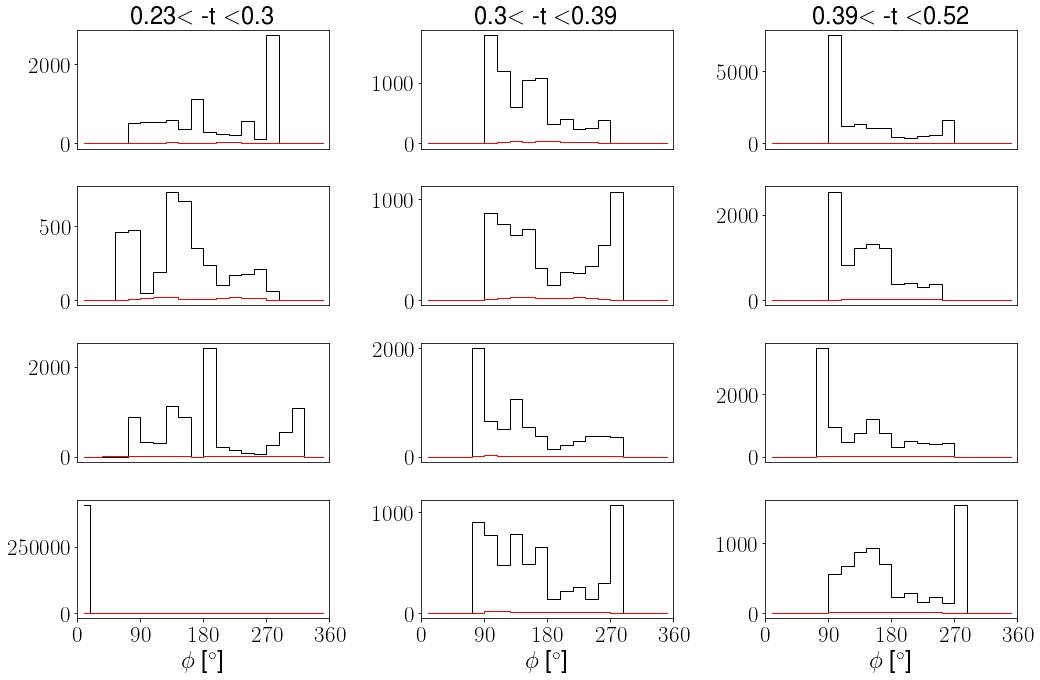

In [345]:
bins = np.linspace(0, 360, 21)
bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
signum = 0
bkgnum = 0
fig, axs = plt.subplots(4, 3, figsize = (15,10))
for ind in range(12):
    bkg = globals()['bkgSimInbFD_bin'+str(ind+1)]
    exp = globals()['epgExpInbFD_bin'+str(ind+1)]
    sig = globals()['dvcsSimInbFD_bin'+str(ind+1)]
#     print(ind+1, end='\t')
    simDist_dvpi0, bins = np.histogram(bkg.phi2, bins = bins)
    simDist_dvcs, bins = np.histogram(sig.phi2, bins = bins)
    expDist, bins = np.histogram(exp.phi2, bins = bins)
    dvcs = expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0
#     signum += ((len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*np.sum(simDist_dvcs))
    row = ind//3
    col = ind%3
    if ind == 0:
        axs[row, col].set_title("0.23"+"$<$"+" -t "+"$<$"+"0.3")
    if ind == 1:
        axs[row, col].set_title("0.3"+"$<$"+" -t "+"$<$"+"0.39")
    if ind == 2:
        axs[row, col].set_title("0.39"+"$<$"+" -t "+"$<$"+"0.52")
        
    gen = gens[ind]
    acc = simDist_dvcs/gen
    accCorrectedSig = copy(acc)
    for ind, val in enumerate(acc):
        if val ==0:
            accCorrectedSig[ind] = 0
        elif dvcs[ind]<0:
            accCorrectedSig[ind] = 0
        else:
            accCorrectedSig[ind] = dvcs[ind]/val
    axs[row, col].step(bincenters, accCorrectedSig, where = 'mid',color='k', linewidth=1)
    axs[row, col].step(bincenters, (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs, where = 'mid', color ='r',linewidth =1)
    axs[row, col].set_xlim([0, 360])
    axs[row, col].set_xticks([])
    if row == 3:
        axs[row, col].set_xticks([0, 90, 180, 270, 360])
        axs[row, col].set_xlabel("$\phi$ [" +degree+"]" )
plt.tight_layout()
# plt.savefig("comp_FD.pdf")
plt.show()

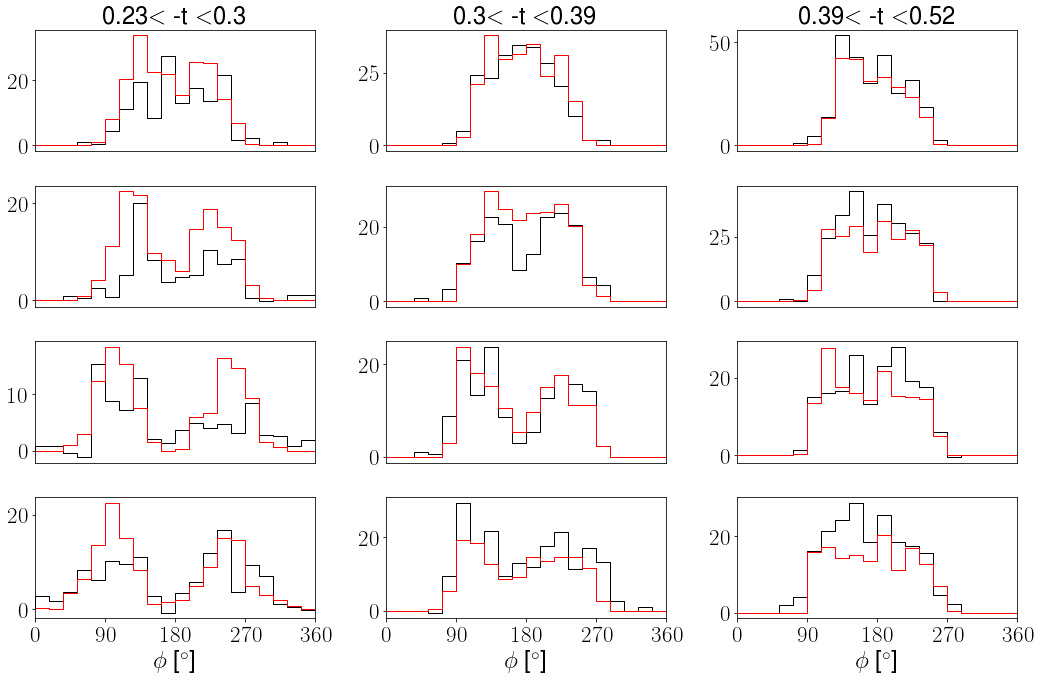

In [328]:
bins = np.linspace(0-18, 360+18, 23)
bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
signum = 0
bkgnum = 0
fig, axs = plt.subplots(4, 3, figsize = (15,10))
for ind in range(12):
    bkg = globals()['bkgSimInbFD_bin'+str(ind+1)]
    exp = globals()['epgExpInbFD_bin'+str(ind+1)]
    sig = globals()['dvcsSimInbFD_bin'+str(ind+1)]
#     print(ind+1, end='\t')
    simDist_dvpi0, bins = np.histogram(bkg.phi2, bins = bins)
    simDist_dvcs, bins = np.histogram(sig.phi2, bins = bins)
    expDist, bins = np.histogram(exp.phi2, bins = bins)
    dvcs = expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0
#     signum += ((len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*np.sum(simDist_dvcs))
    row = ind//3
    col = ind%3
    if ind == 0:
        axs[row, col].set_title("0.23"+"$<$"+" -t "+"$<$"+"0.3")
    if ind == 1:
        axs[row, col].set_title("0.3"+"$<$"+" -t "+"$<$"+"0.39")
    if ind == 2:
        axs[row, col].set_title("0.39"+"$<$"+" -t "+"$<$"+"0.52")
    axs[row, col].step(bincenters, dvcs, where = 'mid',color='k', linewidth=1)
    axs[row, col].step(bincenters, (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs, where = 'mid', color ='r',linewidth =1)
    axs[row, col].set_xlim([0, 360])
    axs[row, col].set_xticks([])
    if row == 3:
        axs[row, col].set_xticks([0, 90, 180, 270, 360])
        axs[row, col].set_xlabel("$\phi$ [" +degree+"]" )
plt.tight_layout()
plt.savefig("comp_FD.pdf")

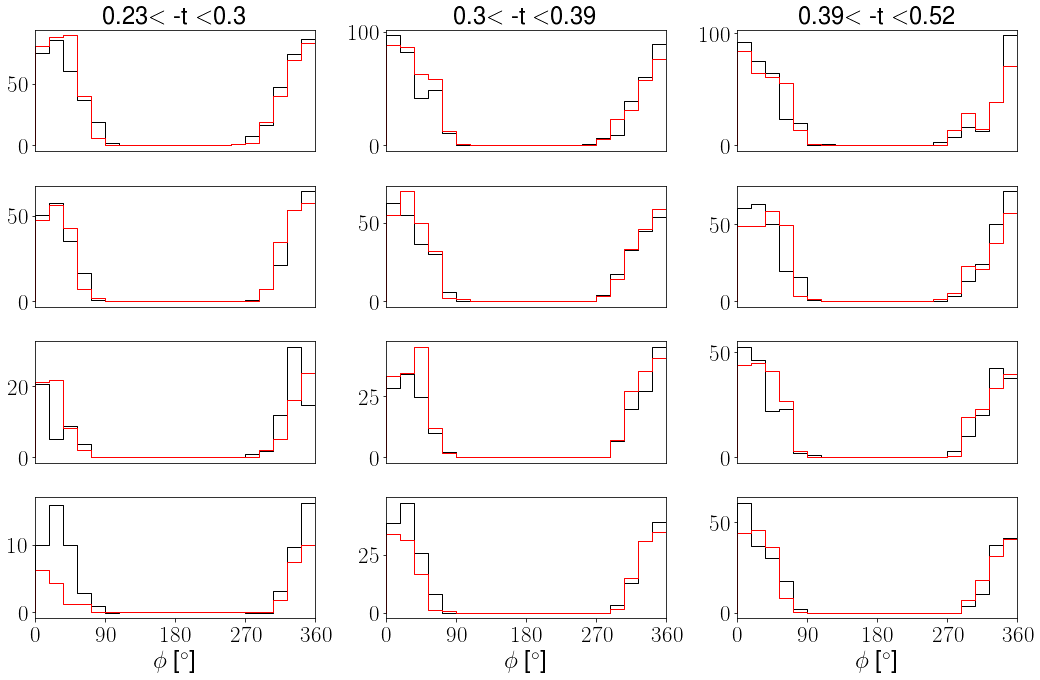

In [327]:
bins = np.linspace(0-18, 360+18, 23)
bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
signum = 0
bkgnum = 0
fig, axs = plt.subplots(4, 3, figsize = (15,10))
for ind in range(12):
    bkg = globals()['bkgSimInbCD_bin'+str(ind+1)]
    exp = globals()['epgExpInbCD_bin'+str(ind+1)]
    sig = globals()['dvcsSimInbCD_bin'+str(ind+1)]
#     print(ind+1, end='\t')
    simDist_dvpi0, bins = np.histogram(bkg.phi2, bins = bins)
    simDist_dvcs, bins = np.histogram(sig.phi2, bins = bins)
    expDist, bins = np.histogram(exp.phi2, bins = bins)
    dvcs = expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0
#     signum += ((len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*np.sum(simDist_dvcs))
    row = ind//3
    col = ind%3
    if ind == 0:
        axs[row, col].set_title("0.23"+"$<$"+" -t "+"$<$"+"0.3")
    if ind == 1:
        axs[row, col].set_title("0.3"+"$<$"+" -t "+"$<$"+"0.39")
    if ind == 2:
        axs[row, col].set_title("0.39"+"$<$"+" -t "+"$<$"+"0.52")
    axs[row, col].step(bincenters, dvcs, where = 'mid',color='k', linewidth=1)
    axs[row, col].step(bincenters, (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs, where = 'mid', color ='r',linewidth =1)
    axs[row, col].set_xlim([0, 360])
    axs[row, col].set_xticks([])
    if row == 3:
        axs[row, col].set_xticks([0, 90, 180, 270, 360])
        axs[row, col].set_xlabel("$\phi$ [" +degree+"]" )
plt.tight_layout()
plt.savefig("comp_CD.pdf")

In [224]:
print(len_dvcsSimInbCD)

5713


In [255]:
print(len_epgExpInbFD - len_pi0ExpInbFD*len_bkgSimInbFD/len_pi0SimInbFD)

2056.654586149012


In [226]:
print(len_dvcsSimInbFD)

5488


In [265]:
print(np.sum(A))

2056.654586149012


In [261]:
print(len_epgExpInbFD- len_pi0ExpInbFD*len_bkgSimInbFD/len_pi0SimInbFD)

2056.654586149012


(array([ 0,  0,  0,  1,  1, 10, 25, 36, 17, 35, 20, 27, 27, 30,  6,  3,  0,
         1,  0,  0]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.,
        198., 216., 234., 252., 270., 288., 306., 324., 342., 360.]))

In [354]:
job2942_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_0.pkl")
job2942_0_bin1 = dfinOneBin(job2942_0, 0.29, 0.32, 2.2, 2.7, 0.23, 0.3, -0.1, 360.1)
np.histogram(job2942_0_bin1.phi2, bins = np.linspace(0, 360, 21))

(array([9, 5, 9, 6, 4, 6, 1, 5, 3, 2, 1, 2, 3, 3, 2, 2, 3, 2, 8, 4]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.,
        198., 216., 234., 252., 270., 288., 306., 324., 342., 360.]))

In [353]:
job2942_0_bin1

Epx       Epy       Epz       Evz  Esector   event       Ppx  \
1057   0.448945  1.088249  6.559069 -3.088072        2    2446  0.223472   
2694  -0.417417 -1.098715  6.204165 -3.650077        5    6174  0.141646   
3041   0.617254 -1.057285  6.268131 -1.890309        6    6942 -0.322430   
3580  -0.684162 -0.996431  6.247663 -1.490883        5    8129  0.229869   
4073  -0.374513 -1.145612  6.161971 -4.120303        5    9383 -0.282540   
...         ...       ...       ...       ...      ...     ...       ...   
72059 -0.717759  0.952604  5.782856 -1.945372        3  164674 -0.213453   
72621  0.492300  1.083258  6.259113  0.088689        2  165977  0.049358   
72633  0.784971 -0.908413  6.605475 -3.968186        6  165998 -0.044826   
74994  0.726777 -0.957724  5.643178 -3.911197        6  171345 -0.223929   
76266  0.649041 -1.011597  6.554441 -3.499540        6  174259 -0.386324   

            Ppy       Ppz       Pvz  ...  GenPpz     GenPp  GenPtheta  \
1057  -0.087383  0.383038 -5.950420  ...  0.4505  0.509996  27.952134   
2694   0.624539  0.432220 -3.553124  ...  0.3993  0.722496  56.449795   
3041   0.130645  0.361289 -2.307237  ...  0.3657  0.511049  44.308702   
3580   0.340349  0.351592 -2.152922  ...  0.3364  0.530552  50.649928   
4073   0.143898  0.424644 -3.100979  ...  0.4605  0.578032  37.186836   
...         ...       ...       ...  ...     ...       ...        ...   
72059  0.055144  0.430101 -0.952247  ...  0.4572  0.504519  25.013206   
72621 -0.415106  0.382339 -0.953214  ...  0.3594  0.539369  48.215225   
72633 -0.226833  0.509594 -2.987788  ...  0.5218  0.571454  24.061320   
74994  0.415363  0.373100 -2.726677  ...  0.3587  0.583139  52.039453   
76266  0.025492  0.422142 -4.321829  ...  0.3937  0.551939  44.495673   

          GenPphi  GenGpx  GenGpy  GenGpz     GenGp  GenGtheta     GenGphi  
1057    -9.462322 -0.6893 -1.0534  3.5710  3.786400  19.419058 -123.199022  
2694    76.916944  0.2807  0.5149  3.9780  4.020995   8.386219   61.402797  
3041   157.623356 -0.2884  0.9245  3.9623  4.078933  13.734592  107.325437  
3580    55.868371  0.4627  0.6583  4.0074  4.087384  11.353408   54.897726  
4073   156.502088  0.6943  1.0007  4.0275  4.207637  16.826031   55.246533  
...           ...     ...     ...     ...       ...        ...         ...  
72059  170.502354  0.9308 -0.9919  4.3499  4.557618  17.364786  -46.820146  
72621  -83.504058 -0.5572 -0.6976  3.8950  3.996016  12.910348 -128.615710  
72633 -101.637884 -0.7375  1.1342  3.4823  3.735871  21.231407  123.033456  
74994  117.880427 -0.5257  0.5577  4.5296  4.593982   9.603554  133.308166  
76266  176.027299 -0.2652  0.9727  3.6928  3.827956  15.270674  105.250632  

[80 rows x 66 columns]